## Dataset Loading

In [11]:
import numpy as np
import pandas as pd

data = pd.read_csv("ADNI1_Annual_2_Yr_3T_1_28_2025.csv")
data.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I99265,136_S_1227,MCI,F,66,m12,MRI,MPR; ; N3; Scaled,Processed,3/06/2008,NiFTI,NaN
1,I120618,136_S_0579,MCI,F,68,m24,MRI,MPR; ; N3; Scaled,Processed,8/18/2008,NiFTI,NaN
2,I40404,136_S_0579,MCI,F,66,bl,MRI,MPR-R; ; N3; Scaled,Processed,7/10/2006,NiFTI,NaN
3,I119735,136_S_0579,MCI,F,66,bl,MRI,MPR-R; ; N3; Scaled_2,Processed,7/10/2006,NiFTI,NaN
4,I83554,136_S_0579,MCI,F,66,m12,MRI,MPR; ; N3; Scaled,Processed,6/25/2007,NiFTI,NaN


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Image Data ID  304 non-null    object 
 1   Subject        304 non-null    object 
 2   Group          304 non-null    object 
 3   Sex            304 non-null    object 
 4   Age            304 non-null    int64  
 5   Visit          304 non-null    object 
 6   Modality       304 non-null    object 
 7   Description    304 non-null    object 
 8   Type           304 non-null    object 
 9   Acq Date       304 non-null    object 
 10  Format         304 non-null    object 
 11  Downloaded     0 non-null      float64
dtypes: float64(1), int64(1), object(10)
memory usage: 28.6+ KB


In [23]:
unique_count_img = data['Image Data ID'].nunique()
unique_count_sub = data['Subject'].nunique()
print("Unique Images: ", unique_count_img)
print("Unique Subjects: ", unique_count_sub)

Unique Images:  304
Unique Subjects:  89


## So, there are 304 unique images and 89 subjects who'd appeared for the testing for alzeimer's

In [26]:
class_distribution = data['Group'].value_counts()
print(class_distribution)

Group
MCI    131
CN     115
AD      58
Name: count, dtype: int64


## So, not too imbalanced prioble. It presents a natural scenatio. So, It's gonna be a good testing for any deep learning model

## Image Data Loading

In [32]:
import zipfile

# Path to the zip file
zip_file_path = 'ADNI1_Annual 2 Yr 3T.zip'

# Directory where you want to extract the contents
extract_dir = 'extracted_files'

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Files have been extracted to: {extract_dir}")

Files have been extracted to: extracted_files


In [1]:
!nvidia-smi

Wed Jan 29 02:05:50 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.94                 Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2080      WDDM  |   00000000:01:00.0  On |                  N/A |
|  0%   38C    P8             10W /  225W |     649MiB /   8192MiB |      2%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [48]:
import os

# Path to the extracted directory
extract_dir = r'extracted_files\ADNI'

# Count the number of folders (subdirectories) in the directory
folder_count = len([f for f in os.listdir(extract_dir) if os.path.isdir(os.path.join(extract_dir, f))])

print(f"Number of folders in '{extract_dir}': {folder_count}")

Number of folders in 'extracted_files\ADNI': 89


In [52]:
!pip install nibabel

   ---------------------------------------- 0.0/3.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.3 MB 330.3 kB/s eta 0:00:10
    --------------------------------------- 0.1/3.3 MB 550.5 kB/s eta 0:00:06
   --- ------------------------------------ 0.3/3.3 MB 2.3 MB/s eta 0:00:02
   ---------- ----------------------------- 0.9/3.3 MB 4.5 MB/s eta 0:00:01
   ------------------------------ --------- 2.5/3.3 MB 10.8 MB/s eta 0:00:01
   ---------------------------------------  3.3/3.3 MB 13.1 MB/s eta 0:00:01
   ---------------------------------------- 3.3/3.3 MB 10.0 MB/s eta 0:00:00


In [60]:
import os
import shutil
import pandas as pd

# Path to the extracted ADNI directory
root_dir = "extracted_files/ADNI"
# Path to the CSV file
csv_file = "ADNI1_Annual_2_Yr_3T_1_28_2025.csv"
# Output directory for flattened images
output_dir = "flattened_images"
os.makedirs(output_dir, exist_ok=True)

# Load the CSV file
df = pd.read_csv(csv_file)

# Extract unique image IDs from the CSV
image_ids = df["Image Data ID"].astype(str).unique()

# Function to find and copy NIfTI files
def flatten_images(root_dir, output_dir, image_ids):
    copied_images = 0
    for dirpath, _, filenames in os.walk(root_dir):
        for file in filenames:
            if file.endswith(".nii"):
                # Extract the image ID from the filename (e.g., I40657.nii)
                image_id = file.split("_")[-1].replace(".nii", "")
                if image_id in image_ids:
                    # Copy the file to the flattened folder
                    src_path = os.path.join(dirpath, file)
                    dst_path = os.path.join(output_dir, f"{image_id}.nii")
                    shutil.copy2(src_path, dst_path)
                    copied_images += 1
    return copied_images

# Flatten the directory
copied_images = flatten_images(root_dir, output_dir, image_ids)
print(f"Total images copied: {copied_images}")

# Check for missing images
missing_images = set(image_ids) - set([f.split(".")[0] for f in os.listdir(output_dir)])
if missing_images:
    print(f"Missing image IDs: {missing_images}")
else:
    print("All images successfully copied.")


Total images copied: 304
All images successfully copied.


Image shape: (240, 256, 160)


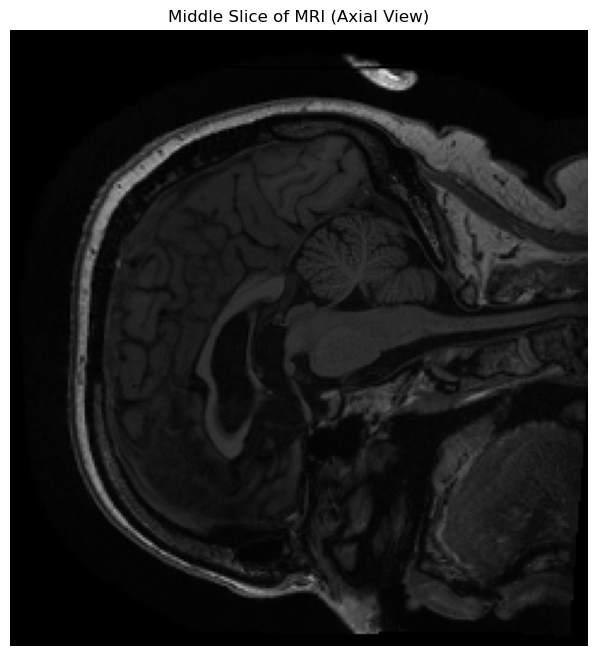

In [66]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

# Path to the NIfTI file
nifti_file = "flattened_images/I101432.nii"

# Load the NIfTI file
img = nib.load(nifti_file)

# Get the data array from the NIfTI file
img_data = img.get_fdata()

# Display the shape of the image
print(f"Image shape: {img_data.shape}")

# Select a slice to visualize (middle slice)
middle_slice = img_data[:, :, img_data.shape[2] // 2]

# Plot the middle slice
plt.figure(figsize=(8, 8))
plt.imshow(middle_slice.T, cmap="gray", origin="lower")
plt.title("Middle Slice of MRI (Axial View)")
plt.axis("off")
plt.show()



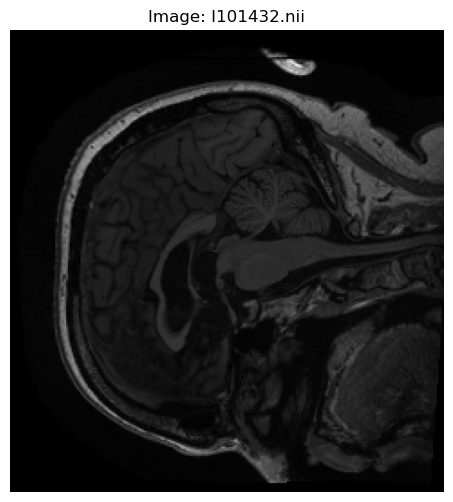

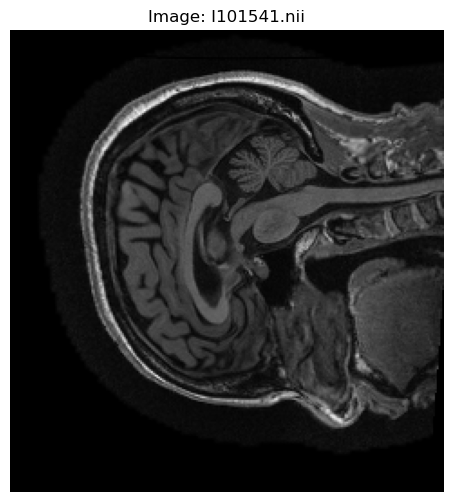

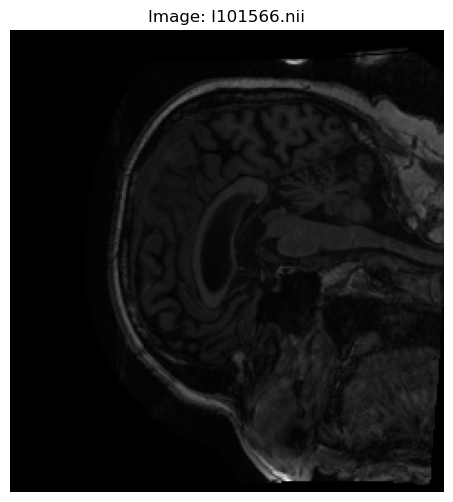

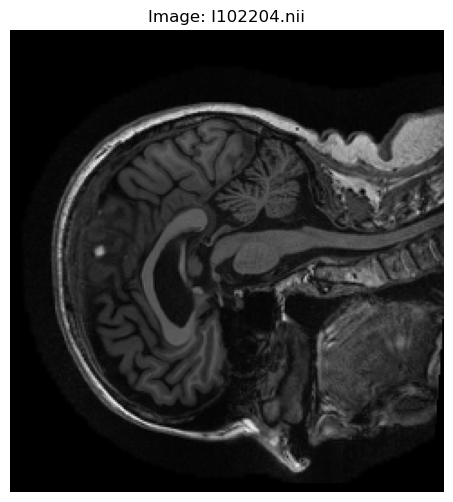

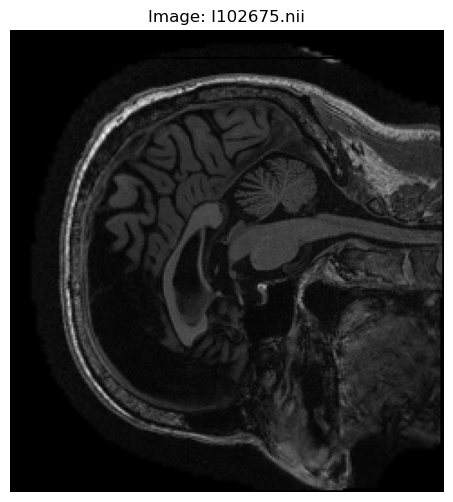

In [70]:
import os
import nibabel as nib
import matplotlib.pyplot as plt

# Path to the folder containing flattened images
folder_path = "flattened_images"

# Get the list of NIfTI files in the folder
nifti_files = [f for f in os.listdir(folder_path) if f.endswith(".nii")]

# Sort the files (optional, to ensure a consistent order)
nifti_files.sort()

# Display the first 10 images
for i, file in enumerate(nifti_files[:5]):
    # Load the NIfTI file
    nifti_path = os.path.join(folder_path, file)
    img = nib.load(nifti_path)
    img_data = img.get_fdata()

    # Get the middle slice
    middle_slice = img_data[:, :, img_data.shape[2] // 2]

    # Plot the slice
    plt.figure(figsize=(6, 6))
    plt.imshow(middle_slice.T, cmap="gray", origin="lower")
    plt.title(f"Image: {file}")
    plt.axis("off")
    plt.show()


In [115]:
!nvidia-smi

Thu Jan 30 02:59:59 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.94                 Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2080      WDDM  |   00000000:01:00.0  On |                  N/A |
|  0%   37C    P8             10W /  225W |     726MiB /   8192MiB |      2%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

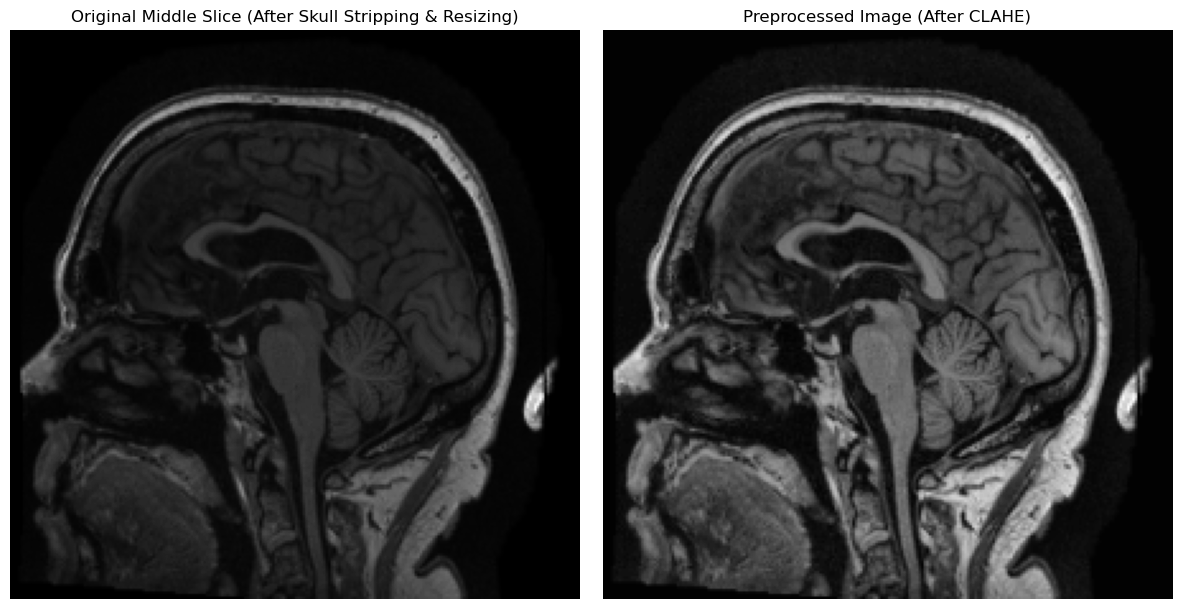

Preprocessed images saved to preprocessed_images


In [72]:
import os
import nibabel as nib
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt


# Input and output directories
input_dir = "flattened_images"
output_dir = "preprocessed_images"
os.makedirs(output_dir, exist_ok=True)

def skull_strip(img):
    """
    Perform a simple threshold-based skull stripping.
    """
    threshold = np.percentile(img, 5)  # Use 5th percentile as a threshold
    mask = img > threshold
    skull_stripped_img = img * mask
    return skull_stripped_img

def preprocess_image(nifti_file):
    """
    Preprocess a single NIfTI file:
    - Normalize intensities
    - Apply skull stripping
    - Resize to 224x224
    - Enhance contrast
    """
    # Load NIfTI file
    img_data = nib.load(nifti_file).get_fdata()
    
    # Normalize intensities to [0, 1]
    normalized_img = (img_data - img_data.min()) / (img_data.max() - img_data.min())
    
    # Apply skull stripping
    skull_stripped_img = skull_strip(normalized_img)
    
    # Extract the middle axial slice
    middle_slice = skull_stripped_img[:, :, skull_stripped_img.shape[2] // 2]
    
    # Resize to 224x224
    resized_img = cv2.resize(middle_slice, (224, 224), interpolation=cv2.INTER_LINEAR)
    
    # Enhance contrast using CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_img = clahe.apply((resized_img * 255).astype('uint8'))
    
    return resized_img, enhanced_img

# Process all NIfTI files in the input folder
for file in os.listdir(input_dir):
    if file.endswith(".nii"):  # Ensure only NIfTI files are processed
        nifti_path = os.path.join(input_dir, file)
        
        # Preprocess the image
        resized_img, enhanced_img = preprocess_image(nifti_path)
        
        # Save the preprocessed image
        output_path = os.path.join(output_dir, file.replace(".nii", ".png"))
        Image.fromarray(enhanced_img).save(output_path)

# Display a before and after comparison
sample_file = os.path.join(input_dir, os.listdir(input_dir)[0])
resized_img, enhanced_img = preprocess_image(sample_file)

# Plot the original middle slice and preprocessed image
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(resized_img, cmap="gray")
axs[0].set_title("Original Middle Slice (After Skull Stripping & Resizing)")
axs[0].axis("off")

axs[1].imshow(enhanced_img, cmap="gray")
axs[1].set_title("Preprocessed Image (After CLAHE)")
axs[1].axis("off")

plt.tight_layout()
plt.show()

print(f"Preprocessed images saved to {output_dir}")


In [1]:
import pandas as pd
import os

# Reload the CSV file
csv_file_path = "ADNI1_Annual_2_Yr_3T_1_28_2025.csv"
metadata_df = pd.read_csv(csv_file_path)

# Define the processed images directory
processed_images_dir = "preprocessed_images"

# Extract the Image Data ID column from the CSV file
metadata_image_ids = metadata_df["Image Data ID"].astype(str)

# Get a list of processed image filenames (without extensions)
processed_image_ids = [os.path.splitext(file)[0] for file in os.listdir(processed_images_dir) if file.endswith(".png")]

# Align metadata and processed images
aligned_data = metadata_df[metadata_df["Image Data ID"].astype(str).isin(processed_image_ids)]

# Check if any images are missing from the processed images folder
missing_images = set(metadata_image_ids) - set(processed_image_ids)

# Output the aligned data and missing image IDs
aligned_data, missing_images


(    Image Data ID     Subject Group Sex  Age Visit Modality  \
 0          I99265  136_S_1227   MCI   F   66   m12      MRI   
 1         I120618  136_S_0579   MCI   F   68   m24      MRI   
 2          I40404  136_S_0579   MCI   F   66    bl      MRI   
 3         I119735  136_S_0579   MCI   F   66    bl      MRI   
 4          I83554  136_S_0579   MCI   F   66   m12      MRI   
 ..            ...         ...   ...  ..  ...   ...      ...   
 299        I82102  002_S_0559    CN   M   81   m12      MRI   
 300        I64551  002_S_0413    CN   F   77   m12      MRI   
 301       I118675  002_S_0413    CN   F   76    bl      MRI   
 302       I120746  002_S_0413    CN   F   79   m24      MRI   
 303        I40657  002_S_0413    CN   F   76    bl      MRI   
 
                Description       Type    Acq Date Format  Downloaded  
 0        MPR; ; N3; Scaled  Processed   3/06/2008  NiFTI         NaN  
 1        MPR; ; N3; Scaled  Processed   8/18/2008  NiFTI         NaN  
 2      MPR-R;

In [78]:
!pip install antspyx

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.7 MB 544.7 kB/s eta 0:00:16
   - -------------------------------------- 0.2/8.7 MB 1.6 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/8.7 MB 3.1 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/8.7 MB 4.1 MB/s eta 0:00:02
   ------ --------------------------------- 1.4/8.7 MB 4.9 MB/s eta 0:00:02
   -------- ------------------------------- 1.9/8.7 MB 5.7 MB/s eta 0:00:02
   ----------- ---------------------------- 2.4/8.7 MB 6.4 MB/s eta 0:00:01
   ------------- -------------------------- 3.0/8.7 MB 7.1 MB/s eta 0:00:01
   ---------------- ----------------------- 3.7/8.7 MB 7.8 MB/s eta 0:00:01
   ------------------- -------------------- 4.3/8.7 MB 8.4 MB/s eta 0:00:01
   ----------------------- ----

In [3]:
!nvidia-smi

Wed Jan 29 02:21:50 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.94                 Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2080      WDDM  |   00000000:01:00.0  On |                  N/A |
|  0%   38C    P8             12W /  225W |     671MiB /   8192MiB |      1%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [82]:
import os
import ants
import pandas as pd

# Paths to input images and output directories
input_dir = "preprocessed_images"  # Folder with NIfTI files
output_dir = "ants_results"
os.makedirs(output_dir, exist_ok=True)

# Load metadata CSV
metadata_csv = "ADNI1_Annual_2_Yr_3T_1_28_2025.csv"
metadata_df = pd.read_csv(metadata_csv)

# Function to extract biomarkers using ANTs
def extract_biomarkers(image_path):
    """
    Extract quantitative biomarkers from an MRI image using ANTs:
    - GM, WM, CSF volumes
    - Mean cortical thickness
    """
    # Load the image
    img = ants.image_read(image_path)

    # Skull stripping: Extract brain region
    brain_mask = ants.get_mask(img, low_thresh=0.1, cleanup=1)
    brain_img = img * brain_mask

    # Tissue segmentation: GM, WM, CSF
    seg_img = ants.atropos(a=img, x=brain_mask, m="[0.1,1x1x1]")['segmentation']
    
    # Calculate volumes
    gm_volume = (seg_img.numpy() == 1).sum() * img.spacing[0] * img.spacing[1] * img.spacing[2]
    wm_volume = (seg_img.numpy() == 2).sum() * img.spacing[0] * img.spacing[1] * img.spacing[2]
    csf_volume = (seg_img.numpy() == 3).sum() * img.spacing[0] * img.spacing[1] * img.spacing[2]

    # Cortical thickness estimation
    template = ants.image_read(ants.get_ants_data("ch2"))  # MNI template
    warped_template = ants.registration(fixed=template, moving=img, type_of_transform="SyN")
    thickness_img = ants.create_cortical_thickness_image(warped_template['warpedfixout'])
    mean_cortical_thickness = thickness_img.mean()

    # Return extracted biomarkers
    return {
        "GM Volume": gm_volume,
        "WM Volume": wm_volume,
        "CSF Volume": csf_volume,
        "Mean Cortical Thickness": mean_cortical_thickness
    }

# Process all images and extract biomarkers
results = []
for file in os.listdir(input_dir):
    if file.endswith(".nii"):
        image_id = os.path.splitext(file)[0]
        subject_id = metadata_df[metadata_df["Image Data ID"] == image_id]["Subject"].values[0]
        image_path = os.path.join(input_dir, file)
        
        print(f"Extracting biomarkers for Image ID {image_id}, Subject {subject_id}...")
        try:
            biomarkers = extract_biomarkers(image_path)
            biomarkers["Image ID"] = image_id
            biomarkers["Subject ID"] = subject_id
            results.append(biomarkers)
        except Exception as e:
            print(f"Error processing Image ID {image_id}: {e}")

# Save biomarkers to a CSV file
results_df = pd.DataFrame(results)
results_df.to_csv("biomarkers_with_ids.csv", index=False)
print("Biomarker extraction complete. Results saved to biomarkers_with_ids.csv.")


Biomarker extraction complete. Results saved to biomarkers_with_ids.csv.


In [86]:
print(results_df.head())

Empty DataFrame
Columns: []
Index: []


In [88]:
# Standardize Image Data ID in metadata
metadata_df["Image Data ID"] = metadata_df["Image Data ID"].astype(str).str.strip().str.lower()

# Standardize processed image IDs
processed_image_ids = [file.lower().strip() for file in os.listdir(input_dir) if file.endswith(".nii")]

# Check alignment again
aligned_data = metadata_df[metadata_df["Image Data ID"].isin(processed_image_ids)]
print("Aligned Data:")
print(aligned_data)


Aligned Data:
Empty DataFrame
Columns: [Image Data ID, Subject, Group, Sex, Age, Visit, Modality, Description, Type, Acq Date, Format, Downloaded]
Index: []


In [92]:
import os
import ants
import pandas as pd

# Paths to input images and output directories
input_dir = "preprocessed_images"  # Folder with NIfTI files
output_csv = "biomarkers.csv"

# Function to extract biomarkers using ANTs
def extract_biomarkers(image_path):
    """
    Extract quantitative biomarkers from an MRI image using ANTs:
    - GM, WM, CSF volumes
    - Mean cortical thickness
    """
    # Load the image
    img = ants.image_read(image_path)

    # Skull stripping: Extract brain region
    brain_mask = ants.get_mask(img, low_thresh=0.1, cleanup=1)
    brain_img = img * brain_mask

    # Tissue segmentation: GM, WM, CSF
    seg_img = ants.atropos(a=img, x=brain_mask, m="[0.1,1x1x1]")['segmentation']
    
    # Calculate volumes
    gm_volume = (seg_img.numpy() == 1).sum() * img.spacing[0] * img.spacing[1] * img.spacing[2]
    wm_volume = (seg_img.numpy() == 2).sum() * img.spacing[0] * img.spacing[1] * img.spacing[2]
    csf_volume = (seg_img.numpy() == 3).sum() * img.spacing[0] * img.spacing[1] * img.spacing[2]

    # Cortical thickness estimation
    template = ants.image_read(ants.get_ants_data("ch2"))  # MNI template
    warped_template = ants.registration(fixed=template, moving=img, type_of_transform="SyN")
    thickness_img = ants.create_cortical_thickness_image(warped_template['warpedfixout'])
    mean_cortical_thickness = thickness_img.mean()

    # Return extracted biomarkers
    return {
        "GM Volume": gm_volume,
        "WM Volume": wm_volume,
        "CSF Volume": csf_volume,
        "Mean Cortical Thickness": mean_cortical_thickness
    }

# Process all images and extract biomarkers
results = []
for file in os.listdir(input_dir):
    if file.endswith(".nii"):
        image_id = os.path.splitext(file)[0]
        image_path = os.path.join(input_dir, file)
        
        print(f"Extracting biomarkers for Image ID {image_id}...")
        try:
            biomarkers = extract_biomarkers(image_path)
            biomarkers["Image ID"] = image_id
            results.append(biomarkers)
        except Exception as e:
            print(f"Error processing Image ID {image_id}: {e}")

# Save biomarkers to a CSV file
results_df = pd.DataFrame(results)
results_df.to_csv(output_csv, index=False)
print(f"Biomarker extraction complete. Results saved to {output_csv}.")


Biomarker extraction complete. Results saved to biomarkers.csv.


In [100]:
import os
import ants
import pandas as pd

# Paths to input images and output directories
input_dir = "preprocessed_images"  # Folder with NIfTI files
output_csv = "biomarkers.csv"

# Function to extract biomarkers using ANTs
def extract_biomarkers(image_path):
    """
    Extract quantitative biomarkers from an MRI image using ANTs:
    - GM, WM, CSF volumes
    - Mean cortical thickness
    """
    try:
        # Load the image
        img = ants.image_read(image_path)

        # Skull stripping: Extract brain region
        brain_mask = ants.get_mask(img, low_thresh=0.1, cleanup=1)
        brain_img = img * brain_mask

        # Tissue segmentation: GM, WM, CSF
        seg_img = ants.atropos(a=img, x=brain_mask, m="[0.1,1x1x1]")['segmentation']
        
        # Calculate volumes
        voxel_volume = img.spacing[0] * img.spacing[1] * img.spacing[2]  # mm³
        gm_volume = (seg_img.numpy() == 1).sum() * voxel_volume
        wm_volume = (seg_img.numpy() == 2).sum() * voxel_volume
        csf_volume = (seg_img.numpy() == 3).sum() * voxel_volume

        # Cortical thickness estimation
        template = ants.image_read(ants.get_ants_data("ch2"))  # MNI template
        warped_template = ants.registration(fixed=template, moving=img, type_of_transform="SyN")
        thickness_img = ants.create_cortical_thickness_image(warped_template['warpedfixout'])
        mean_cortical_thickness = thickness_img.mean()

        # Return extracted biomarkers
        return {
            "GM Volume": gm_volume,
            "WM Volume": wm_volume,
            "CSF Volume": csf_volume,
            "Mean Cortical Thickness": mean_cortical_thickness
        }
    except Exception as e:
        print(f"Error during ANTs processing: {e}")
        return None

# Process all images and extract biomarkers
results = []
for file in os.listdir(input_dir):
    if file.endswith(".nii"):
        image_id = os.path.splitext(file)[0]
        image_path = os.path.join(input_dir, file)
        
        print(f"Extracting biomarkers for Image ID {image_id}...")
        biomarkers = extract_biomarkers(image_path)
        if biomarkers:  # Only append if processing was successful
            biomarkers["Image ID"] = image_id
            results.append(biomarkers)

# Save biomarkers to a CSV file if results exist
if results:
    results_df = pd.DataFrame(results)
    results_df.to_csv(output_csv, index=False)
    print(f"Biomarker extraction complete. Results saved to {output_csv}.")
else:
    print("No biomarkers extracted. Check the input data or processing pipeline.")


No biomarkers extracted. Check the input data or processing pipeline.


In [102]:
print("Files in the input directory:")
for file in os.listdir(input_dir):
    print(file)


Files in the input directory:
I101432.png
I101541.png
I101566.png
I102204.png
I102675.png
I102840.png
I103276.png
I103654.png
I103663.png
I103681.png
I104471.png
I105848.png
I105888.png
I105924.png
I106467.png
I106524.png
I106542.png
I107779.png
I108422.png
I109187.png
I109196.png
I109893.png
I111192.png
I118668.png
I118675.png
I118679.png
I118773.png
I118790.png
I118837.png
I118846.png
I118848.png
I118851.png
I118852.png
I118854.png
I118856.png
I118858.png
I118871.png
I118880.png
I118882.png
I118904.png
I118908.png
I118916.png
I118920.png
I118922.png
I118924.png
I119001.png
I119006.png
I119018.png
I119026.png
I119032.png
I119146.png
I119158.png
I119201.png
I119204.png
I119685.png
I119712.png
I119721.png
I119725.png
I119729.png
I119731.png
I119733.png
I119735.png
I120256.png
I120403.png
I120416.png
I120423.png
I120426.png
I120436.png
I120441.png
I120446.png
I120451.png
I120460.png
I120469.png
I120476.png
I120479.png
I120521.png
I120544.png
I120553.png
I120562.png
I120575.png
I120580.pn

## Image feature extraction

## Dataset splitting

In [5]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the aligned data (already matched with labels and images)
csv_file_path = "ADNI1_Annual_2_Yr_3T_1_28_2025.csv"
aligned_data.to_csv("aligned_metadata.csv", index=False)

# Define train, validation, and test split ratios
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Split data into training and temporary sets (for validation and testing)
train_data, temp_data = train_test_split(aligned_data, test_size=(1 - train_ratio), random_state=42, stratify=aligned_data["Group"])

# Further split temporary set into validation and test sets
val_data, test_data = train_test_split(temp_data, test_size=(test_ratio / (test_ratio + val_ratio)), random_state=42, stratify=temp_data["Group"])

# Save the split data for reference
train_data.to_csv("train_data.csv", index=False)
val_data.to_csv("val_data.csv", index=False)
test_data.to_csv("test_data.csv", index=False)

print(f"Data split completed:")
print(f"Training set: {len(train_data)} samples")
print(f"Validation set: {len(val_data)} samples")
print(f"Test set: {len(test_data)} samples")


Data split completed:
Training set: 212 samples
Validation set: 46 samples
Test set: 46 samples


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Reload the aligned data
aligned_data = pd.read_csv("aligned_metadata.csv")

# Encode the 'Group' column
group_mapping = {"CN": 0, "MCI": 1, "AD": 2}
aligned_data["Group"] = aligned_data["Group"].map(group_mapping)

# Verify encoding
print("Encoded Groups:")
print(aligned_data["Group"].value_counts())

# Split the data into train, validation, and test sets
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# First, split into train and temporary (validation + test)
train_data, temp_data = train_test_split(
    aligned_data, test_size=(1 - train_ratio), random_state=42, stratify=aligned_data["Group"]
)

# Split the temporary set into validation and test
val_data, test_data = train_test_split(
    temp_data, test_size=(test_ratio / (test_ratio + val_ratio)), random_state=42, stratify=temp_data["Group"]
)

# Save splits
train_data.to_csv("train_data.csv", index=False)
val_data.to_csv("val_data.csv", index=False)
test_data.to_csv("test_data.csv", index=False)

print(f"Training set size: {len(train_data)}")
print(f"Validation set size: {len(val_data)}")
print(f"Test set size: {len(test_data)}")


Encoded Groups:
Group
1    131
0    115
2     58
Name: count, dtype: int64
Training set size: 212
Validation set size: 46
Test set size: 46


In [14]:
!nvidia-smi

Wed Jan 29 01:48:03 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.94                 Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2080      WDDM  |   00000000:01:00.0  On |                  N/A |
|  0%   37C    P8              8W /  225W |     513MiB /   8192MiB |      2%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [117]:
import transformers
import torch

print("Transformers version:", transformers.__version__)
print("PyTorch version:", torch.__version__)


Transformers version: 4.45.2
PyTorch version: 2.2.2+cpu


In [9]:
import torch
print("PyTorch Version:", torch.__version__)
print("CUDA Available:", torch.cuda.is_available())
print("Device:", torch.device("cuda" if torch.cuda.is_available() else "cpu"))


PyTorch Version: 2.2.2+cpu
CUDA Available: False
Device: cpu


In [9]:
import accelerate
print(accelerate.__version__)  # Should be >= 0.26.0


1.3.0


## VIT 

In [15]:
import os
import pandas as pd
from PIL import Image
import tensorflow as tf
from transformers import AutoImageProcessor, TFAutoModelForImageClassification
import numpy as np
import pandas as pd

# ✅ Ensure TensorFlow is Used
os.environ["TRANSFORMERS_NO_TORCH"] = "1"

# Paths to datasets and preprocessed images
train_csv = "train_data.csv"
val_csv = "val_data.csv"
test_csv = "test_data.csv"
image_dir = "preprocessed_images"

# Load Data Splits
train_data = pd.read_csv(train_csv)
val_data = pd.read_csv(val_csv)
test_data = pd.read_csv(test_csv)

# ✅ Load ViT Model and Image Processor
checkpoint = "google/vit-base-patch16-224-in21k"
image_processor = AutoImageProcessor.from_pretrained(checkpoint)
model = TFAutoModelForImageClassification.from_pretrained(
    checkpoint,
    num_labels=3  # Number of classes: CN, MCI, AD
)

# ✅ Define Data Generator for TensorFlow
class MRIImageDataset(tf.keras.utils.Sequence):
    def __init__(self, dataframe, image_dir, batch_size=2):
        self.dataframe = dataframe
        self.image_dir = image_dir
        self.batch_size = batch_size
        self.indexes = np.arange(len(self.dataframe))

    def __len__(self):
        return int(np.floor(len(self.dataframe) / self.batch_size))

    def __getitem__(self, index):
        batch_indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        batch = [self.dataframe.iloc[k] for k in batch_indexes]
        
        images = []
        labels = []
        
        for row in batch:
            img_path = os.path.join(self.image_dir, f"{row['Image Data ID']}.png")
            image = Image.open(img_path).convert("RGB")
            image = image_processor(image, return_tensors="np")["pixel_values"][0]
            
            label = row["Group"]  # Encoded label
            images.append(image)
            labels.append(label)

        return np.array(images), np.array(labels)

# ✅ Create Dataset Objects
batch_size = 2  # Keep it small to avoid memory crashes
train_dataset = MRIImageDataset(train_data, image_dir, batch_size=batch_size)
val_dataset = MRIImageDataset(val_data, image_dir, batch_size=batch_size)

# ✅ Compile Model with TensorFlow Optimizer
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

# ✅ Train the Model
model.fit(train_dataset, validation_data=val_dataset, epochs=5)

# ✅ Evaluate Model
test_dataset = MRIImageDataset(test_data, image_dir, batch_size=batch_size)
test_results = model.evaluate(test_dataset)
print(f"Test results: {test_results}")


Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFViTForImageClassification: ['pooler.dense.weight', 'pooler.dense.bias']
- This IS expected if you are initializing TFViTForImageClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFViTForImageClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFViTForImageClassification were not initialized from the PyTorch model and are newly init

Epoch 1/5


106/106 [==============================] - 121s 893ms/step - loss: 1.0453 - accuracy: 0.4858 - val_loss: 1.0554 - val_accuracy: 0.3696
Epoch 2/5
106/106 [==============================] - 92s 870ms/step - loss: 0.9850 - accuracy: 0.5236 - val_loss: 1.0253 - val_accuracy: 0.5435
Epoch 3/5
106/106 [==============================] - 92s 871ms/step - loss: 0.7283 - accuracy: 0.7594 - val_loss: 0.9406 - val_accuracy: 0.6087
Epoch 4/5
106/106 [==============================] - 91s 858ms/step - loss: 0.4141 - accuracy: 0.9057 - val_loss: 1.0235 - val_accuracy: 0.5217
Epoch 5/5
23/23 [==============================] - 4s 161ms/step - loss: 0.5993 - accuracy: 0.7609
Test results: [0.5993407964706421, 0.760869562625885]


In [13]:
import keras

# Print the Keras version
print("Keras version:", keras.__version__)

Keras version: 3.6.0


In [15]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [19]:
!pip install tf-keras


^C


In [17]:
!nvidia-smi

Wed Jan 29 02:46:50 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.94                 Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2080      WDDM  |   00000000:01:00.0  On |                  N/A |
|  0%   40C    P8             11W /  225W |     620MiB /   8192MiB |      2%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [19]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image
from transformers import AutoImageProcessor, TFAutoModel
from tensorflow.keras.utils import to_categorical

# ✅ Set GPU Options
gpus = tf.config.experimental.list_physical_devices("GPU")
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("✅ TensorFlow is using GPU")
    except RuntimeError as e:
        print(e)

# ✅ Load ViT Model (TensorFlow)
checkpoint = "google/vit-base-patch16-224-in21k"
image_processor = AutoImageProcessor.from_pretrained(checkpoint)
model = TFAutoModel.from_pretrained(checkpoint)  # TF version of ViT

# ✅ Paths
image_dir = "preprocessed_images"
train_csv = "train_data.csv"
val_csv = "val_data.csv"
test_csv = "test_data.csv"

# ✅ Load CSV Data
train_data = pd.read_csv(train_csv)
val_data = pd.read_csv(val_csv)
test_data = pd.read_csv(test_csv)

# ✅ Image Processing Function
def preprocess_image(img_path):
    image = Image.open(img_path).convert("RGB")
    inputs = image_processor(images=image, return_tensors="tf")
    return inputs["pixel_values"]

# ✅ Feature Extraction Function
def extract_features(df, save_path):
    features, labels = [], []
    for index, row in df.iterrows():
        img_path = os.path.join(image_dir, f"{row['Image Data ID']}.png")
        if os.path.exists(img_path):
            image_tensor = preprocess_image(img_path)
            embeddings = model(image_tensor, training=False).last_hidden_state[:, 0, :].numpy()  # CLS Token Representation
            features.append(embeddings)
            labels.append(row["Group"])  # Encode Label
        else:
            print(f"❌ Image {img_path} not found!")

    features = np.vstack(features)  # Convert list to NumPy array
    labels = np.array(labels)

    # ✅ Save Features
    np.savez_compressed(save_path, features=features, labels=labels)
    print(f"✅ Saved features to {save_path}")

# ✅ Extract and Save Features
extract_features(train_data, "vit_train_features.npz")
extract_features(val_data, "vit_val_features.npz")
extract_features(test_data, "vit_test_features.npz")


Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
All PyTorch model weights were used when initializing TFViTModel.

All the weights of TFViTModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFViTModel for predictions without further training.


✅ Saved features to vit_train_features.npz
✅ Saved features to vit_val_features.npz
✅ Saved features to vit_test_features.npz


In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, accuracy_score

# ✅ Load Extracted Features
train_data = np.load("vit_train_features.npz")
val_data = np.load("vit_val_features.npz")
test_data = np.load("vit_test_features.npz")

X_train, y_train = train_data["features"], train_data["labels"]
X_val, y_val = val_data["features"], val_data["labels"]
X_test, y_test = test_data["features"], test_data["labels"]

# ✅ Encode Labels (One-Hot Encoding)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

# ✅ Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# ✅ Train Logistic Regression
logistic_model = LogisticRegression(max_iter=2000)
logistic_model.fit(X_train, np.argmax(y_train, axis=1))
y_pred_logistic = logistic_model.predict(X_test)

print("\n🔹 Logistic Regression Results:")
print(classification_report(np.argmax(y_test, axis=1), y_pred_logistic))

# ✅ Define MLP Model (TensorFlow)
mlp_model = keras.Sequential([
    layers.Dense(512, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dense(256, activation="relu"),
    layers.Dense(3, activation="softmax")  # 3 classes: CN, MCI, AD
])

mlp_model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# ✅ Train MLP Model
mlp_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=16)

# ✅ Evaluate MLP Model
y_pred_mlp = np.argmax(mlp_model.predict(X_test), axis=1)

print("\n🔹 MLP Classifier Results:")
print(classification_report(np.argmax(y_test, axis=1), y_pred_mlp))



🔹 Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.53      0.56      0.54        18
           1       0.60      0.60      0.60        20
           2       0.29      0.25      0.27         8

    accuracy                           0.52        46
   macro avg       0.47      0.47      0.47        46
weighted avg       0.52      0.52      0.52        46

Epoch 1/10


C:\Users\sran-m36\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4707 - loss: 1.3964 - val_accuracy: 0.5217 - val_loss: 1.1933
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8633 - loss: 0.3943 - val_accuracy: 0.5217 - val_loss: 1.3438
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9876 - loss: 0.1097 - val_accuracy: 0.5652 - val_loss: 1.2356
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9983 - loss: 0.0546 - val_accuracy: 0.5870 - val_loss: 1.4494
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0187 - val_accuracy: 0.5870 - val_loss: 1.5697
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0101 - val_accuracy: 0.5870 - val_loss: 1.5983
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0060 - val_accuracy: 0.5652 - val_loss: 1.6160
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 0.5870 - val_loss: 1.6503
Ep

In [25]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

# ✅ Load Extracted Features
train_data = np.load("vit_train_features.npz")
val_data = np.load("vit_val_features.npz")
test_data = np.load("vit_test_features.npz")

X_train, y_train = train_data["features"], train_data["labels"]
X_val, y_val = val_data["features"], val_data["labels"]
X_test, y_test = test_data["features"], test_data["labels"]

# ✅ Encode Labels (One-Hot Encoding)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

# ✅ Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# ✅ Define MLP Model (TensorFlow)
mlp_model = keras.Sequential([
    layers.Dense(512, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),  # Regularization to prevent overfitting
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(3, activation="softmax")  # 3 classes: CN, MCI, AD
])

# ✅ Compile Model
mlp_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# ✅ Callbacks (Early Stopping + ReduceLROnPlateau)
early_stopping = callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=2,
    min_lr=1e-6
)

# ✅ Train MLP Model
history = mlp_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,  # ✅ Max Epochs = 30
    batch_size=16,
    callbacks=[early_stopping, reduce_lr]
)

# ✅ Evaluate MLP Model
y_pred_mlp = np.argmax(mlp_model.predict(X_test), axis=1)

print("\n🔹 MLP Classifier Results:")
print(classification_report(np.argmax(y_test, axis=1), y_pred_mlp))


Epoch 1/30


C:\Users\sran-m36\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4323 - loss: 1.3669 - val_accuracy: 0.5000 - val_loss: 1.1014 - learning_rate: 0.0010
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7435 - loss: 0.6136 - val_accuracy: 0.5217 - val_loss: 1.2079 - learning_rate: 0.0010
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7963 - loss: 0.5780 - val_accuracy: 0.6087 - val_loss: 1.4187 - learning_rate: 0.0010
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8925 - loss: 0.3009 - val_accuracy: 0.5652 - val_loss: 1.3332 - learning_rate: 5.0000e-04
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9610 - loss: 0.2016 - val_accuracy: 0.5652 - val_loss: 1.2917 - learning_rate: 5.0000e-04
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9343 - loss: 0.1692 - val_accuracy: 0.6304 - val_loss: 1.2901 - learning_rate: 2.5000e-04
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function Ten

In [35]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

# ✅ Load Extracted Features
train_data = np.load("vit_train_features.npz")
val_data = np.load("vit_val_features.npz")
test_data = np.load("vit_test_features.npz")

X_train, y_train = train_data["features"], train_data["labels"]
X_val, y_val = val_data["features"], val_data["labels"]
X_test, y_test = test_data["features"], test_data["labels"]

# ✅ Encode Labels (One-Hot Encoding)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

# ✅ Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# ✅ Define MLP Model (3 Hidden Layers)
mlp_model = keras.Sequential([
    layers.Dense(512, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),  # Regularization
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(128, activation="relu"),  # ✅ Additional Hidden Layer
    layers.Dropout(0.3),
    layers.Dense(3, activation="softmax")  # 3 classes: CN, MCI, AD
])

# ✅ Compile Model
mlp_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# ✅ Callbacks (Early Stopping + ReduceLROnPlateau)
early_stopping = callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,  # ✅ Stops if no improvement for 3 epochs
    restore_best_weights=True
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=2,
    min_lr=1e-6
)

# ✅ Train MLP Model
history = mlp_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,  # ✅ Max Epochs = 30
    batch_size=16,  # ✅ Small batch size to avoid memory issues
    callbacks=[early_stopping, reduce_lr]
)

# ✅ Evaluate MLP Model
y_pred_mlp = np.argmax(mlp_model.predict(X_test), axis=1)

print("\n🔹 MLP Classifier Results:")
print(classification_report(np.argmax(y_test, axis=1), y_pred_mlp))



Epoch 1/30


C:\Users\sran-m36\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.3512 - loss: 1.4065 - val_accuracy: 0.4565 - val_loss: 1.0741 - learning_rate: 0.0010
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5922 - loss: 0.9763 - val_accuracy: 0.6087 - val_loss: 1.0716 - learning_rate: 0.0010
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6520 - loss: 0.7735 - val_accuracy: 0.5652 - val_loss: 0.9568 - learning_rate: 0.0010
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7452 - loss: 0.6830 - val_accuracy: 0.5217 - val_loss: 1.0771 - learning_rate: 0.0010
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8256 - loss: 0.4999 - val_accuracy: 0.5652 - val_loss: 1.2344 - learning_rate: 0.0010
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8649 - loss: 0.3509 - val_accuracy: 0.5870 - val_loss: 1.2371 - learning_rate: 5.0000e-04
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8561 - loss: 0.3833 - val_accuracy: 0.5652

## CNN

In [42]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from PIL import Image

# ✅ Paths to Image Data
image_dir = "preprocessed_images"

# ✅ Load Metadata Splits
train_df = pd.read_csv("train_data.csv")
val_df = pd.read_csv("val_data.csv")
test_df = pd.read_csv("test_data.csv")

# ✅ Encode Labels (CN=0, MCI=1, AD=2)
label_encoder = LabelEncoder()
train_df["Group"] = label_encoder.fit_transform(train_df["Group"])
val_df["Group"] = label_encoder.transform(val_df["Group"])
test_df["Group"] = label_encoder.transform(test_df["Group"])

# ✅ Image Preprocessing Function (No resizing or normalization needed)
def load_and_preprocess_image(image_id):
    img_path = os.path.join(image_dir, f"{image_id}.png")
    image = Image.open(img_path).convert("RGB")  # Ensure RGB format
    image = np.array(image)  # Convert to numpy array
    return image

# ✅ Load Images & Labels into Numpy Arrays
def load_dataset(dataframe):
    images = np.array([load_and_preprocess_image(img_id) for img_id in dataframe["Image Data ID"]])
    labels = to_categorical(dataframe["Group"], num_classes=3)  # One-hot encoding for 3 classes
    return images, labels

X_train, y_train = load_dataset(train_df)
X_val, y_val = load_dataset(val_df)
X_test, y_test = load_dataset(test_df)

print(f"Training Data: {X_train.shape}, Labels: {y_train.shape}")
print(f"Validation Data: {X_val.shape}, Labels: {y_val.shape}")
print(f"Test Data: {X_test.shape}, Labels: {y_test.shape}")

# ✅ Load Pretrained CNN (ResNet50 as Backbone)
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze weights initially

# ✅ Define Custom CNN Model
cnn_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(256, activation="relu"),  # ✅ Added Second Hidden Layer
    layers.Dropout(0.3),
    layers.Dense(3, activation="softmax")  # 3 Classes: CN, MCI, AD
])

# ✅ Compile Model
cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# ✅ Callbacks
early_stopping = callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-6)

# ✅ Train Model
history = cnn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,  # ✅ Max Epochs = 30
    batch_size=16,  # ✅ Small batch size to avoid memory issues
    callbacks=[early_stopping, reduce_lr]
)

# ✅ Evaluate on Test Set
test_results = cnn_model.evaluate(X_test, y_test)
print(f"\n🔹 Test Results: {test_results}")


Training Data: (212, 224, 224, 3), Labels: (212, 3)
Validation Data: (46, 224, 224, 3), Labels: (46, 3)
Test Data: (46, 224, 224, 3), Labels: (46, 3)
Epoch 1/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 15s 541ms/step - accuracy: 0.4272 - loss: 1.2995 - val_accuracy: 0.4348 - val_loss: 1.0133 - learning_rate: 1.0000e-04
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 423ms/step - accuracy: 0.4356 - loss: 1.1789 - val_accuracy: 0.4348 - val_loss: 0.9880 - learning_rate: 1.0000e-04
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 408ms/step - accuracy: 0.4831 - loss: 1.0492 - val_accuracy: 0.5870 - val_loss: 0.9630 - learning_rate: 1.0000e-04
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 422ms/step - accuracy: 0.5424 - loss: 0.9537 - val_accuracy: 0.5000 - val_loss: 0.9683 - learning_rate: 1.0000e-04
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 406ms/step - accuracy: 0.4816 - loss: 0.9764 - val_accuracy: 0.5652 - val_loss: 0.9586 - learning_rate: 1.0000e-04
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 403ms/step - accuracy: 0.471

## Effieinceface

In [45]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from PIL import Image

# ✅ Paths to Image Data
image_dir = "preprocessed_images"

# ✅ Load Metadata Splits
train_df = pd.read_csv("train_data.csv")
val_df = pd.read_csv("val_data.csv")
test_df = pd.read_csv("test_data.csv")

# ✅ Encode Labels (CN=0, MCI=1, AD=2)
label_encoder = LabelEncoder()
train_df["Group"] = label_encoder.fit_transform(train_df["Group"])
val_df["Group"] = label_encoder.transform(val_df["Group"])
test_df["Group"] = label_encoder.transform(test_df["Group"])

# ✅ Image Preprocessing Function (No resizing or normalization needed)
def load_and_preprocess_image(image_id):
    img_path = os.path.join(image_dir, f"{image_id}.png")
    image = Image.open(img_path).convert("RGB")  # Ensure RGB format
    image = np.array(image)  # Convert to numpy array
    return image

# ✅ Load Images & Labels into Numpy Arrays
def load_dataset(dataframe):
    images = np.array([load_and_preprocess_image(img_id) for img_id in dataframe["Image Data ID"]])
    labels = to_categorical(dataframe["Group"], num_classes=3)  # One-hot encoding for 3 classes
    return images, labels

X_train, y_train = load_dataset(train_df)
X_val, y_val = load_dataset(val_df)
X_test, y_test = load_dataset(test_df)

print(f"Training Data: {X_train.shape}, Labels: {y_train.shape}")
print(f"Validation Data: {X_val.shape}, Labels: {y_val.shape}")
print(f"Test Data: {X_test.shape}, Labels: {y_test.shape}")

# ✅ Load Pretrained EfficientNetB0 as Backbone
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze weights initially

# ✅ Define Custom Model
cnn_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(3, activation="softmax")  # 3 Classes: CN, MCI, AD
])

# ✅ Compile Model
cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# ✅ Callbacks
early_stopping = callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-6)

# ✅ Train Model
history = cnn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=16,
    callbacks=[early_stopping, reduce_lr]
)

# ✅ Evaluate on Test Set
test_results = cnn_model.evaluate(X_test, y_test)
print(f"\n🔹 Test Results: {test_results}")

# ✅ Save Model for Future Use


Training Data: (212, 224, 224, 3), Labels: (212, 3)
Validation Data: (46, 224, 224, 3), Labels: (46, 3)
Test Data: (46, 224, 224, 3), Labels: (46, 3)
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 17s 432ms/step - accuracy: 0.4150 - loss: 1.1327 - val_accuracy: 0.3478 - val_loss: 1.0959 - learning_rate: 1.0000e-04
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 220ms/step - accuracy: 0.2714 - loss: 1.3250 - val_accuracy: 0.3913 - val_loss: 1.0849 - learning_rate: 1.0000e-04
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 218ms/step - accuracy: 0.4072 - loss: 1.1460 - val_accuracy: 0.5217 - val_loss: 1.0382 - learning_rate: 1.0000e-04
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 220ms/step - accuracy: 0.4251 - loss: 1.0502 - val_accuracy: 0.4783 - val_loss: 1.0366 - learning_rate: 1.0000e-04
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 220ms/step - accuracy: 0.4533 - loss: 1.0812 - val_accuracy: 0.5217 - val_loss: 1.0372 - learning_rate: 1.0000e-04
Epoch 6/30
14/14 ━

In [47]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from PIL import Image

# ✅ Paths to Image Data
image_dir = "preprocessed_images"

# ✅ Load Metadata Splits
train_df = pd.read_csv("train_data.csv")
val_df = pd.read_csv("val_data.csv")
test_df = pd.read_csv("test_data.csv")

# ✅ Encode Labels (CN=0, MCI=1, AD=2)
label_encoder = LabelEncoder()
train_df["Group"] = label_encoder.fit_transform(train_df["Group"])
val_df["Group"] = label_encoder.transform(val_df["Group"])
test_df["Group"] = label_encoder.transform(test_df["Group"])

# ✅ Image Preprocessing Function (Resize & Normalize)
def load_and_preprocess_image(image_id):
    img_path = os.path.join(image_dir, f"{image_id}.png")
    image = Image.open(img_path).convert("RGB")  # Ensure RGB format
    image = image.resize((224, 224))  # Resize to 224x224
    image = np.array(image) / 255.0  # Normalize to [0,1]
    return image

# ✅ Load Images & Labels into Numpy Arrays
def load_dataset(dataframe):
    images = np.array([load_and_preprocess_image(img_id) for img_id in dataframe["Image Data ID"]])
    labels = to_categorical(dataframe["Group"], num_classes=3)  # One-hot encoding for 3 classes
    return images, labels

X_train, y_train = load_dataset(train_df)
X_val, y_val = load_dataset(val_df)
X_test, y_test = load_dataset(test_df)

print(f"Training Data: {X_train.shape}, Labels: {y_train.shape}")
print(f"Validation Data: {X_val.shape}, Labels: {y_val.shape}")
print(f"Test Data: {X_test.shape}, Labels: {y_test.shape}")

# ✅ Load Pretrained EfficientNetB0 as Backbone
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = True  # ✅ Unfreeze for fine-tuning

# ✅ Fine-Tune Last Few Layers
for layer in base_model.layers[:-30]:  # Freeze all layers except the last 30
    layer.trainable = False

# ✅ Define Custom Model with Fine-Tuning
cnn_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(3, activation="softmax")  # 3 Classes: CN, MCI, AD
])

# ✅ Compile Model (Lower Learning Rate for Fine-Tuning)
cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),  # ✅ Lower LR for fine-tuning
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# ✅ Callbacks (Fine-Tuning Best Practices)
early_stopping = callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-6)

# ✅ Train Fine-Tuned Model
history = cnn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=16,
    callbacks=[early_stopping, reduce_lr]
)

# ✅ Evaluate on Test Set
test_results = cnn_model.evaluate(X_test, y_test)
print(f"\n🔹 Test Results After Fine-Tuning: {test_results}")




Training Data: (212, 224, 224, 3), Labels: (212, 3)
Validation Data: (46, 224, 224, 3), Labels: (46, 3)
Test Data: (46, 224, 224, 3), Labels: (46, 3)
Epoch 1/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 433ms/step - accuracy: 0.2916 - loss: 1.1630 - val_accuracy: 0.3696 - val_loss: 1.1044 - learning_rate: 5.0000e-05
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 255ms/step - accuracy: 0.3288 - loss: 1.1224 - val_accuracy: 0.3696 - val_loss: 1.0931 - learning_rate: 5.0000e-05
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 256ms/step - accuracy: 0.4179 - loss: 1.0945 - val_accuracy: 0.3696 - val_loss: 1.0876 - learning_rate: 5.0000e-05
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 256ms/step - accuracy: 0.3216 - loss: 1.1062 - val_accuracy: 0.3696 - val_loss: 1.0830 - learning_rate: 5.0000e-05
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 254ms/step - accuracy: 0.4415 - loss: 1.0536 - val_accuracy: 0.3696 - val_loss: 1.0772 - learning_rate: 5.0000e-05
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 254ms/step - accuracy: 0.382

In [49]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from PIL import Image

# ✅ Paths to Image Data
image_dir = "preprocessed_images"

# ✅ Load Metadata Splits
train_df = pd.read_csv("train_data.csv")
val_df = pd.read_csv("val_data.csv")
test_df = pd.read_csv("test_data.csv")

# ✅ Encode Labels (CN=0, MCI=1, AD=2)
label_encoder = LabelEncoder()
train_df["Group"] = label_encoder.fit_transform(train_df["Group"])
val_df["Group"] = label_encoder.transform(val_df["Group"])
test_df["Group"] = label_encoder.transform(test_df["Group"])

# ✅ Image Preprocessing Function
def load_and_preprocess_image(image_id):
    img_path = os.path.join(image_dir, f"{image_id}.png")
    image = Image.open(img_path).convert("RGB")  # Ensure RGB format
    return image

# ✅ Load Images & Labels into Numpy Arrays
def load_dataset(dataframe):
    images = np.array([load_and_preprocess_image(img_id) for img_id in dataframe["Image Data ID"]])
    labels = to_categorical(dataframe["Group"], num_classes=3)  # One-hot encoding for 3 classes
    return images, labels

X_train, y_train = load_dataset(train_df)
X_val, y_val = load_dataset(val_df)
X_test, y_test = load_dataset(test_df)

print(f"Training Data: {X_train.shape}, Labels: {y_train.shape}")
print(f"Validation Data: {X_val.shape}, Labels: {y_val.shape}")
print(f"Test Data: {X_test.shape}, Labels: {y_test.shape}")

# ✅ Define MedNIST-CNN Model (A Simple CNN for Medical Imaging)
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),  # Prevent Overfitting

    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),

    layers.Dense(3, activation="softmax")  # 3 Classes: CN, MCI, AD
])

# ✅ Compile Model
cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# ✅ Callbacks
early_stopping = callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-6)

# ✅ Train Model
history = cnn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=8,  # 🔹 Reduced batch size to prevent memory issues
    callbacks=[early_stopping, reduce_lr]
)

# ✅ Evaluate on Test Set
test_results = cnn_model.evaluate(X_test, y_test)
print(f"\n🔹 Test Results: {test_results}")


Training Data: (212, 224, 224, 3), Labels: (212, 3)
Validation Data: (46, 224, 224, 3), Labels: (46, 3)
Test Data: (46, 224, 224, 3), Labels: (46, 3)
Epoch 1/30


C:\Users\sran-m36\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 330ms/step - accuracy: 0.3892 - loss: 71.9667 - val_accuracy: 0.4348 - val_loss: 3.1208 - learning_rate: 1.0000e-04
Epoch 2/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 321ms/step - accuracy: 0.3809 - loss: 15.0707 - val_accuracy: 0.3913 - val_loss: 1.5022 - learning_rate: 1.0000e-04
Epoch 3/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 322ms/step - accuracy: 0.4982 - loss: 2.3863 - val_accuracy: 0.6087 - val_loss: 0.9108 - learning_rate: 1.0000e-04
Epoch 4/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 323ms/step - accuracy: 0.5246 - loss: 1.1387 - val_accuracy: 0.5217 - val_loss: 0.9567 - learning_rate: 1.0000e-04
Epoch 5/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 319ms/step - accuracy: 0.6303 - loss: 1.0171 - val_accuracy: 0.6304 - val_loss: 0.8630 - learning_rate: 1.0000e-04
Epoch 6/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 319ms/step - accuracy: 0.6871 - loss: 0.7537 - val_accuracy: 0.5870 - val_loss: 0.8889 - learning_rate: 1.0000e-04
Epoch 7/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 317ms/step - accuracy: 0.7227 -

In [55]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from PIL import Image

# ✅ Paths to Image Data
image_dir = "preprocessed_images"

# ✅ Load Metadata Splits
train_df = pd.read_csv("train_data.csv")
val_df = pd.read_csv("val_data.csv")
test_df = pd.read_csv("test_data.csv")

# ✅ Encode Labels (CN=0, MCI=1, AD=2)
label_encoder = LabelEncoder()
train_df["Group"] = label_encoder.fit_transform(train_df["Group"])
val_df["Group"] = label_encoder.transform(val_df["Group"])
test_df["Group"] = label_encoder.transform(test_df["Group"])

# ✅ Image Preprocessing Function (Resize + Normalize)
def load_and_preprocess_image(image_id):
    img_path = os.path.join(image_dir, f"{image_id}.png")
    image = Image.open(img_path).convert("RGB")  # Ensure RGB format
    image = image.resize((224, 224))  # Resize to 224x224
    image = np.array(image) / 255.0  # Normalize (0-1 range)
    return image

# ✅ Load Images & Labels into Numpy Arrays
def load_dataset(dataframe):
    images = np.array([load_and_preprocess_image(img_id) for img_id in dataframe["Image Data ID"]])
    labels = to_categorical(dataframe["Group"], num_classes=3)  # One-hot encoding for 3 classes
    return images, labels

X_train, y_train = load_dataset(train_df)
X_val, y_val = load_dataset(val_df)
X_test, y_test = load_dataset(test_df)

print(f"Training Data: {X_train.shape}, Labels: {y_train.shape}")
print(f"Validation Data: {X_val.shape}, Labels: {y_val.shape}")
print(f"Test Data: {X_test.shape}, Labels: {y_test.shape}")

# ✅ Data Augmentation using ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=15,         # Random rotation (0-15 degrees)
    width_shift_range=0.1,     # Horizontal shift (10%)
    height_shift_range=0.1,    # Vertical shift (10%)
    horizontal_flip=True,      # Random horizontal flip
    zoom_range=0.2,            # Random zoom (20%)
)

val_datagen = ImageDataGenerator()  # No augmentation for validation/test

# ✅ Create Data Generators
train_generator = train_datagen.flow(X_train, y_train, batch_size=8)
val_generator = val_datagen.flow(X_val, y_val, batch_size=8)

# ✅ Define MedNIST-CNN Model (A Simple CNN for Medical Imaging)
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),  # Prevent Overfitting

    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),

    layers.Dense(3, activation="softmax")  # 3 Classes: CN, MCI, AD
])

# ✅ Compile Model
cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# ✅ Callbacks
early_stopping = callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-6)

# ✅ Train Model (Using Data Generators)
history = cnn_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[early_stopping, reduce_lr]
)

# ✅ Evaluate on Test Set
test_results = cnn_model.evaluate(X_test, y_test)
print(f"\n🔹 Test Results: {test_results}")


Training Data: (212, 224, 224, 3), Labels: (212, 3)
Validation Data: (46, 224, 224, 3), Labels: (46, 3)
Test Data: (46, 224, 224, 3), Labels: (46, 3)


C:\Users\sran-m36\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\sran-m36\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 354ms/step - accuracy: 0.3379 - loss: 1.1187 - val_accuracy: 0.3696 - val_loss: 1.0324 - learning_rate: 1.0000e-04
Epoch 2/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 342ms/step - accuracy: 0.3771 - loss: 1.0902 - val_accuracy: 0.4565 - val_loss: 1.0371 - learning_rate: 1.0000e-04
Epoch 3/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 339ms/step - accuracy: 0.3557 - loss: 1.0759 - val_accuracy: 0.3696 - val_loss: 1.0370 - learning_rate: 1.0000e-04
Epoch 4/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 344ms/step - accuracy: 0.3832 - loss: 1.0644 - val_accuracy: 0.4348 - val_loss: 1.0308 - learning_rate: 5.0000e-05
Epoch 5/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 337ms/step - accuracy: 0.3750 - loss: 1.0667 - val_accuracy: 0.4348 - val_loss: 1.0330 - learning_rate: 5.0000e-05
Epoch 6/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 333ms/step - accuracy: 0.3619 - loss: 1.0556 - val_accuracy: 0.4348 - val_loss: 1.0326 - learning_rate: 5.0000e-05
Epoch 7/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 327ms/step - accuracy:

In [59]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from PIL import Image

# ✅ Paths to Image Data
image_dir = "preprocessed_images"

# ✅ Load Metadata Splits
train_df = pd.read_csv("train_data.csv")
val_df = pd.read_csv("val_data.csv")
test_df = pd.read_csv("test_data.csv")

# ✅ Encode Labels (CN=0, MCI=1, AD=2)
label_encoder = LabelEncoder()
train_df["Group"] = label_encoder.fit_transform(train_df["Group"])
val_df["Group"] = label_encoder.transform(val_df["Group"])
test_df["Group"] = label_encoder.transform(test_df["Group"])

# ✅ Image Preprocessing Function (Resize + Normalize)
def load_and_preprocess_image(image_id):
    img_path = os.path.join(image_dir, f"{image_id}.png")
    image = Image.open(img_path).convert("RGB")  # Ensure RGB format
    
    return image

# ✅ Load Images & Labels into Numpy Arrays
def load_dataset(dataframe):
    images = np.array([load_and_preprocess_image(img_id) for img_id in dataframe["Image Data ID"]])
    labels = to_categorical(dataframe["Group"], num_classes=3)  # One-hot encoding for 3 classes
    return images, labels

X_train, y_train = load_dataset(train_df)
X_val, y_val = load_dataset(val_df)
X_test, y_test = load_dataset(test_df)

print(f"Training Data: {X_train.shape}, Labels: {y_train.shape}")
print(f"Validation Data: {X_val.shape}, Labels: {y_val.shape}")
print(f"Test Data: {X_test.shape}, Labels: {y_test.shape}")

# ✅ Define MedNIST-CNN Model (A Simple CNN for Medical Imaging)
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)),
    layers.BatchNormalization(),  # 🔹 Added Batch Normalization
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),  # Prevent Overfitting

    layers.Dense(256, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(3, activation="softmax")  # 3 Classes: CN, MCI, AD
])

# ✅ Compile Model
cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# ✅ Callbacks (Early Stopping + ReduceLROnPlateau)
early_stopping = callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-6)

# ✅ Train Model
history = cnn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,  # 🔹 Max Epochs = 30
    batch_size=8,  # 🔹 Small batch size to prevent memory issues
    callbacks=[early_stopping, reduce_lr]
)

# ✅ Evaluate on Test Set
test_results = cnn_model.evaluate(X_test, y_test)
print(f"\n🔹 Test Results: {test_results}")


Training Data: (212, 224, 224, 3), Labels: (212, 3)
Validation Data: (46, 224, 224, 3), Labels: (46, 3)
Test Data: (46, 224, 224, 3), Labels: (46, 3)
Epoch 1/30


C:\Users\sran-m36\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 16s 452ms/step - accuracy: 0.3920 - loss: 1.8974 - val_accuracy: 0.1957 - val_loss: 4.8338 - learning_rate: 1.0000e-04
Epoch 2/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 438ms/step - accuracy: 0.5955 - loss: 1.1005 - val_accuracy: 0.4348 - val_loss: 1.3265 - learning_rate: 1.0000e-04
Epoch 3/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 437ms/step - accuracy: 0.6353 - loss: 0.9755 - val_accuracy: 0.4565 - val_loss: 0.9766 - learning_rate: 1.0000e-04
Epoch 4/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 441ms/step - accuracy: 0.6786 - loss: 0.8367 - val_accuracy: 0.5000 - val_loss: 1.0009 - learning_rate: 1.0000e-04
Epoch 5/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 441ms/step - accuracy: 0.7482 - loss: 0.6957 - val_accuracy: 0.6087 - val_loss: 0.8598 - learning_rate: 1.0000e-04
Epoch 6/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 444ms/step - accuracy: 0.8004 - loss: 0.5008 - val_accuracy: 0.6087 - val_loss: 0.8821 - learning_rate: 1.0000e-04
Epoch 7/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 441ms/step - accuracy: 0.73

In [61]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from PIL import Image

# ✅ Paths to Image Data
image_dir = "preprocessed_images"

# ✅ Load Metadata Splits
train_df = pd.read_csv("train_data.csv")
val_df = pd.read_csv("val_data.csv")
test_df = pd.read_csv("test_data.csv")

# ✅ Encode Labels (CN=0, MCI=1, AD=2)
label_encoder = LabelEncoder()
train_df["Group"] = label_encoder.fit_transform(train_df["Group"])
val_df["Group"] = label_encoder.transform(val_df["Group"])
test_df["Group"] = label_encoder.transform(test_df["Group"])

# ✅ Image Preprocessing Function (Resize + Normalize)
def load_and_preprocess_image(image_id):
    img_path = os.path.join(image_dir, f"{image_id}.png")
    image = Image.open(img_path).convert("RGB")  # Ensure RGB format

    return image

# ✅ Load Images & Labels into Numpy Arrays
def load_dataset(dataframe):
    images = np.array([load_and_preprocess_image(img_id) for img_id in dataframe["Image Data ID"]])
    labels = to_categorical(dataframe["Group"], num_classes=3)  # One-hot encoding for 3 classes
    return images, labels

X_train, y_train = load_dataset(train_df)
X_val, y_val = load_dataset(val_df)
X_test, y_test = load_dataset(test_df)

print(f"Training Data: {X_train.shape}, Labels: {y_train.shape}")
print(f"Validation Data: {X_val.shape}, Labels: {y_val.shape}")
print(f"Test Data: {X_test.shape}, Labels: {y_test.shape}")

# ✅ Load Pretrained DenseNet-121 (ImageNet Weights)
base_model = DenseNet121(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the DenseNet backbone initially

# ✅ Define DenseNet-121 Model for ADNI MRI Classification
cnn_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),  # Prevent Overfitting

    layers.Dense(256, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(3, activation="softmax")  # 3 Classes: CN, MCI, AD
])

# ✅ Compile Model
cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# ✅ Callbacks (Early Stopping + ReduceLROnPlateau)
early_stopping = callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-6)

# ✅ Train Model
history = cnn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,  # 🔹 Max Epochs = 30
    batch_size=8,  # 🔹 Small batch size to prevent memory issues
    callbacks=[early_stopping, reduce_lr]
)

# ✅ Evaluate on Test Set
test_results = cnn_model.evaluate(X_test, y_test)
print(f"\n🔹 Test Results: {test_results}")


Training Data: (212, 224, 224, 3), Labels: (212, 3)
Validation Data: (46, 224, 224, 3), Labels: (46, 3)
Test Data: (46, 224, 224, 3), Labels: (46, 3)
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 25s 374ms/step - accuracy: 0.2927 - loss: 2.3886 - val_accuracy: 0.3696 - val_loss: 2.3001 - learning_rate: 1.0000e-04
Epoch 2/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 233ms/step - accuracy: 0.3854 - loss: 2.0065 - val_accuracy: 0.3478 - val_loss: 1.3704 - learning_rate: 1.0000e-04
Epoch 3/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 232ms/step - accuracy: 0.3727 - loss: 1.8933 - val_accuracy: 0.3043 - val_loss: 1.3303 - learning_rate: 1.0000e-04
Epoch 4/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 229ms/step - accuracy: 0.3841 - loss: 1.7762 - val_accuracy: 0.3913 - val_loss: 1.1674 - learning_rate: 1.0000e-04
Epoch 5/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 230ms/step - accuracy: 0.4002 - loss: 1.7127 - val_accuracy: 0.3261 - val_loss: 1.1531 - learning_rate: 1.0000e-04
Epoch 6/30
27/27 ━

## Clinical Assessments

In [1]:
import pandas as pd

# List of file names
file_names = [
    "CDR_29Jan2025.csv",
    "ADASSCORES_29Jan2025.csv",
    "BLSCHECK_29Jan2025.csv",
    "MMSE_29Jan2025.csv"
]

# Dictionary to store the dataframes
dataframes = {}

# Loop through each file and read it into a dataframe
for file_name in file_names:
    # Read the CSV file
    df = pd.read_csv(file_name)
    
    # Store the dataframe in the dictionary
    dataframes[file_name] = df

# Now you can access each dataframe using the file name as the key
# For example, to access the CDR_29Jan2025.csv dataframe:
cdr_df = dataframes["CDR_29Jan2025.csv"]

# You can perform further operations on the dataframes as needed

In [3]:
cdr_df.head()

,PHASE,PTID,RID,VISCODE,VISCODE2,VISDATE,CDSOURCE,CDVERSION,SPID,CDMEMORY,...,CDGLOBAL,CDRSB,ID,SITEID,USERDATE,USERDATE2,DD_CRF_VERSION_LABEL,LANGUAGE_CODE,HAS_QC_ERROR,update_stamp
0,ADNI1,011_S_0002,2,sc,sc,2005-08-17,1.0,NaN,NaN,0.0,...,0.0,0.0,8,107,2005-08-17,2009-10-05,NaN,NaN,NaN,2009-10-05 00:00:00.0
1,ADNI1,011_S_0003,3,sc,sc,2005-08-18,1.0,NaN,NaN,1.0,...,1.0,4.5,10,107,2005-08-18,2009-10-05,NaN,NaN,NaN,2009-10-05 00:00:00.0
2,ADNI1,022_S_0004,4,sc,sc,2005-08-18,1.0,NaN,NaN,0.5,...,0.5,1.0,12,10,2005-08-18,2009-10-05,NaN,NaN,NaN,2009-10-05 00:00:00.0
3,ADNI1,011_S_0005,5,sc,sc,2005-08-23,1.0,NaN,NaN,0.0,...,0.0,0.0,14,107,2005-08-23,2009-10-05,NaN,NaN,NaN,2009-10-05 00:00:00.0
4,ADNI1,022_S_0007,7,sc,sc,2005-08-25,1.0,NaN,NaN,1.0,...,1.0,6.0,16,10,2005-08-25,2009-10-05,NaN,NaN,NaN,2009-10-05 00:00:00.0


In [9]:
cdr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13883 entries, 0 to 13882
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PHASE                 13883 non-null  object 
 1   PTID                  13883 non-null  object 
 2   RID                   13883 non-null  int64  
 3   VISCODE               13883 non-null  object 
 4   VISCODE2              13867 non-null  object 
 5   VISDATE               13876 non-null  object 
 6   CDSOURCE              13722 non-null  float64
 7   CDVERSION             8904 non-null   float64
 8   SPID                  3766 non-null   float64
 9   CDMEMORY              13793 non-null  float64
 10  CDORIENT              13794 non-null  float64
 11  CDJUDGE               13794 non-null  float64
 12  CDCOMMUN              13793 non-null  float64
 13  CDHOME                13793 non-null  float64
 14  CDCARE                13793 non-null  float64
 15  CDGLOBAL           

In [12]:
data = pd.read_csv("ADNI1_Annual_2_Yr_3T_1_28_2025.csv")
data.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I99265,136_S_1227,MCI,F,66,m12,MRI,MPR; ; N3; Scaled,Processed,3/06/2008,NiFTI,NaN
1,I120618,136_S_0579,MCI,F,68,m24,MRI,MPR; ; N3; Scaled,Processed,8/18/2008,NiFTI,NaN
2,I40404,136_S_0579,MCI,F,66,bl,MRI,MPR-R; ; N3; Scaled,Processed,7/10/2006,NiFTI,NaN
3,I119735,136_S_0579,MCI,F,66,bl,MRI,MPR-R; ; N3; Scaled_2,Processed,7/10/2006,NiFTI,NaN
4,I83554,136_S_0579,MCI,F,66,m12,MRI,MPR; ; N3; Scaled,Processed,6/25/2007,NiFTI,NaN


In [14]:
# Filter the dataframe where PTID is '136_S_1227'
filtered_row = cdr_df[cdr_df['PTID'] == '136_S_1227']

# Display the entire row
print(filtered_row)

      PHASE        PTID   RID VISCODE VISCODE2     VISDATE  CDSOURCE  \
1385  ADNI1  136_S_1227  1227      sc       sc  2007-01-29       1.0   
2189  ADNI1  136_S_1227  1227     m06      m06  2007-08-27       1.0   
2773  ADNI1  136_S_1227  1227     m12      m12  2008-03-06       1.0   
3303  ADNI1  136_S_1227  1227     m18      m18  2008-09-29       1.0   
3612  ADNI1  136_S_1227  1227     m24      m24  2009-03-23       1.0   
4050  ADNI1  136_S_1227  1227     m36      m36  2010-03-22       1.0   

      CDVERSION  SPID  CDMEMORY  ...  CDGLOBAL  CDRSB    ID  SITEID  \
1385        NaN   NaN       0.5  ...       0.5    1.0  2786     123   
2189        NaN   NaN       0.5  ...       0.5    0.5  4396     123   
2773        NaN   NaN       0.5  ...       0.5    1.0  5566     123   
3303        NaN   NaN       0.5  ...       0.5    0.5  6628     123   
3612        NaN   NaN       0.5  ...       0.5    0.5  7248     123   
4050        NaN   NaN       0.5  ...       0.5    1.5  8124     123  

In [40]:
# Filter the dataframe where PTID is '136_S_1227' and VISDATE is '3/06/2008'
filtered_row = cdr_df[cdr_df['PTID'] == '136_S_0086']

# Display the entire row
print(filtered_row)


      PHASE        PTID  RID VISCODE VISCODE2     VISDATE  CDSOURCE  \
290   ADNI1  136_S_0086   86      sc       sc  2006-03-27       1.0   
1022  ADNI1  136_S_0086   86     m06      m06  2006-10-30       1.0   
1771  ADNI1  136_S_0086   86     m12      m12  2007-05-01       1.0   
3453  ADNI1  136_S_0086   86     m24      m24  2009-01-05      -1.0   
3726  ADNI1  136_S_0086   86     m36      m36  2009-04-28       1.0   
4113  ADNI1  136_S_0086   86     m48      m48  2010-06-29       1.0   

      CDVERSION  SPID  CDMEMORY  ...  CDGLOBAL  CDRSB    ID  SITEID  \
290         NaN   NaN       0.0  ...       0.0    0.0   590     123   
1022        NaN   NaN       0.0  ...       0.0    0.0  2060     123   
1771        NaN   NaN       0.0  ...       0.0    0.0  3560     123   
3453        NaN   NaN      -1.0  ...      -1.0    NaN  6930     123   
3726        NaN   NaN       0.0  ...       0.0    0.0  7476     123   
4113        NaN   NaN       0.0  ...       0.0    0.0  8252     123   

    

In [30]:
# Reload the newly uploaded CDR file
cdr_path_new = "CDR_29Jan2025.csv"
cdr_df_new = pd.read_csv(cdr_path_new)

# Filter entries where PHASE == 'ANI1'
filtered_cdr_df = cdr_df_new[cdr_df_new["PHASE"] == "ADNI1"]





In [32]:
filtered_cdr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4205 entries, 0 to 4204
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PHASE                 4205 non-null   object 
 1   PTID                  4205 non-null   object 
 2   RID                   4205 non-null   int64  
 3   VISCODE               4205 non-null   object 
 4   VISCODE2              4205 non-null   object 
 5   VISDATE               4205 non-null   object 
 6   CDSOURCE              4205 non-null   float64
 7   CDVERSION             0 non-null      float64
 8   SPID                  0 non-null      float64
 9   CDMEMORY              4205 non-null   float64
 10  CDORIENT              4205 non-null   float64
 11  CDJUDGE               4205 non-null   float64
 12  CDCOMMUN              4205 non-null   float64
 13  CDHOME                4205 non-null   float64
 14  CDCARE                4205 non-null   float64
 15  CDGLOBAL              4205

In [34]:
filtered_cdr_df.head()

,PHASE,PTID,RID,VISCODE,VISCODE2,VISDATE,CDSOURCE,CDVERSION,SPID,CDMEMORY,...,CDGLOBAL,CDRSB,ID,SITEID,USERDATE,USERDATE2,DD_CRF_VERSION_LABEL,LANGUAGE_CODE,HAS_QC_ERROR,update_stamp
0,ADNI1,011_S_0002,2,sc,sc,2005-08-17,1.0,NaN,NaN,0.0,...,0.0,0.0,8,107,2005-08-17,2009-10-05,NaN,NaN,NaN,2009-10-05 00:00:00.0
1,ADNI1,011_S_0003,3,sc,sc,2005-08-18,1.0,NaN,NaN,1.0,...,1.0,4.5,10,107,2005-08-18,2009-10-05,NaN,NaN,NaN,2009-10-05 00:00:00.0
2,ADNI1,022_S_0004,4,sc,sc,2005-08-18,1.0,NaN,NaN,0.5,...,0.5,1.0,12,10,2005-08-18,2009-10-05,NaN,NaN,NaN,2009-10-05 00:00:00.0
3,ADNI1,011_S_0005,5,sc,sc,2005-08-23,1.0,NaN,NaN,0.0,...,0.0,0.0,14,107,2005-08-23,2009-10-05,NaN,NaN,NaN,2009-10-05 00:00:00.0
4,ADNI1,022_S_0007,7,sc,sc,2005-08-25,1.0,NaN,NaN,1.0,...,1.0,6.0,16,10,2005-08-25,2009-10-05,NaN,NaN,NaN,2009-10-05 00:00:00.0


In [52]:
complete_data = pd.read_csv("Merged_ADNI1_CDR_ADAS_MMSE_Imputed.csv")
complete_data.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded,CDGLOBAL,CDRSB,TOTAL11,TOTALMOD,MMSCORE
0,I66824,136_S_1227,MCI,F,65,bl,MRI,MPR; ; N3; Scaled,Processed,2007-02-21,NiFTI,NaN,0.5,1.0,7.67,12.67,29.0
1,I143856,136_S_1227,MCI,F,67,m24,MRI,MPR; ; N3; Scaled,Processed,2009-03-23,NiFTI,NaN,0.5,0.5,11.00,18.00,29.0
2,I99265,136_S_1227,MCI,F,66,m12,MRI,MPR; ; N3; Scaled,Processed,2008-03-06,NiFTI,NaN,0.5,1.0,9.33,13.33,30.0
3,I120618,136_S_0579,MCI,F,68,m24,MRI,MPR; ; N3; Scaled,Processed,2008-08-18,NiFTI,NaN,0.0,0.0,2.33,5.33,30.0
4,I40404,136_S_0579,MCI,F,66,bl,MRI,MPR-R; ; N3; Scaled,Processed,2006-07-10,NiFTI,NaN,0.5,1.0,3.00,6.00,29.0


In [54]:
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Image Data ID  306 non-null    object 
 1   Subject        306 non-null    object 
 2   Group          306 non-null    object 
 3   Sex            306 non-null    object 
 4   Age            306 non-null    int64  
 5   Visit          306 non-null    object 
 6   Modality       306 non-null    object 
 7   Description    306 non-null    object 
 8   Type           306 non-null    object 
 9   Acq Date       306 non-null    object 
 10  Format         306 non-null    object 
 11  Downloaded     0 non-null      float64
 12  CDGLOBAL       306 non-null    float64
 13  CDRSB          306 non-null    float64
 14  TOTAL11        306 non-null    float64
 15  TOTALMOD       306 non-null    float64
 16  MMSCORE        306 non-null    float64
dtypes: float64(6), int64(1), object(10)
memory usage: 40.8

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the imputed dataset
imputed_data_path = "Merged_ADNI1_CDR_ADAS_MMSE_Imputed.csv"
df = pd.read_csv(imputed_data_path)

# Select features and target variable
features = ["CDGLOBAL", "TOTAL11", "MMSCORE"]
target = "Group"

# Encode target variable (if it's categorical)
df[target] = df[target].astype("category").cat.codes  # Convert categorical to numerical

# Split dataset into 70% training, 15% validation, 15% testing
train_data, temp_data, train_labels, temp_labels = train_test_split(
    df[features], df[target], test_size=0.30, random_state=42, stratify=df[target]
)

val_data, test_data, val_labels, test_labels = train_test_split(
    temp_data, temp_labels, test_size=0.50, random_state=42, stratify=temp_labels
)

# Train a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(train_data, train_labels)

# Evaluate on validation set
val_predictions = clf.predict(val_data)
val_accuracy = accuracy_score(val_labels, val_predictions)

# Evaluate on test set
test_predictions = clf.predict(test_data)
test_accuracy = accuracy_score(test_labels, test_predictions)
test_report = classification_report(test_labels, test_predictions)

# Display results
model_performance = pd.DataFrame({
    "Set": ["Validation", "Test"],
    "Accuracy": [val_accuracy, test_accuracy]
})


# Show detailed classification report
test_report


'              precision    recall  f1-score   support\n\n           0       0.50      0.67      0.57         9\n           1       1.00      1.00      1.00        17\n           2       0.82      0.70      0.76        20\n\n    accuracy                           0.80        46\n   macro avg       0.77      0.79      0.78        46\nweighted avg       0.83      0.80      0.81        46\n'

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load the imputed dataset
imputed_data_path = "Merged_ADNI1_CDR_ADAS_MMSE_Imputed.csv"
df = pd.read_csv(imputed_data_path)

# Select features and target variable
features = ["CDGLOBAL", "TOTAL11", "MMSCORE"]
target = "Group"

# Preserve original categories
original_categories = df[target].unique()

# Encode target variable properly
df['encoded_group'] = df[target].astype("category").cat.codes

# Split dataset
train_data, temp_data, train_labels, temp_labels = train_test_split(
    df[features], df['encoded_group'], 
    test_size=0.30, random_state=42, stratify=df['encoded_group']
)

val_data, test_data, val_labels, test_labels = train_test_split(
    temp_data, temp_labels, test_size=0.50, 
    random_state=42, stratify=temp_labels
)

# Train model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(train_data, train_labels)

# Evaluate
val_predictions = clf.predict(val_data)
test_predictions = clf.predict(test_data)

# Create performance report
model_performance = pd.DataFrame({
    "Set": ["Validation", "Test"],
    "Accuracy": [
        accuracy_score(val_labels, val_predictions),
        accuracy_score(test_labels, test_predictions)
    ]
})

# Display results
print("\nModel Performance:")
print(model_performance.to_string(index=False))

print("\nDetailed Classification Report:")
print(classification_report(test_labels, test_predictions, 
                           target_names=original_categories))


Model Performance:
       Set  Accuracy
Validation  0.695652
      Test  0.804348

Detailed Classification Report:
              precision    recall  f1-score   support

         MCI       0.50      0.67      0.57         9
          AD       1.00      1.00      1.00        17
          CN       0.82      0.70      0.76        20

    accuracy                           0.80        46
   macro avg       0.77      0.79      0.78        46
weighted avg       0.83      0.80      0.81        46



In [66]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert data to tensors
X_train = torch.tensor(train_data.values, dtype=torch.float32)
X_val = torch.tensor(val_data.values, dtype=torch.float32)
X_test = torch.tensor(test_data.values, dtype=torch.float32)

y_train = torch.tensor(train_labels.values, dtype=torch.long)
y_val = torch.tensor(val_labels.values, dtype=torch.long)
y_test = torch.tensor(test_labels.values, dtype=torch.long)

# Create DataLoaders
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Define MLP Model
class MLP(nn.Module):
    def __init__(self, input_size, hidden1, hidden2, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.fc3 = nn.Linear(hidden2, output_size)
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim=1)
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x

# Model parameters
input_size = X_train.shape[1]
hidden1 = 64
hidden2 = 32
output_size = len(original_categories)  # Number of classes

# Initialize model, loss function, and optimizer
model = MLP(input_size, hidden1, hidden2, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 200
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    # Validation
    model.eval()
    val_correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            total += labels.size(0)
    
    val_acc = val_correct / total

    # Print training progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Validation Accuracy: {val_acc:.4f}")

# Testing phase
model.eval()
test_correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        test_correct += (predicted == labels).sum().item()
        total += labels.size(0)
        all_preds.extend(predicted.tolist())
        all_labels.extend(labels.tolist())

test_acc = test_correct / total

# Display test results
print("\nFinal Test Accuracy: {:.4f}".format(test_acc))
print("\nDetailed Classification Report:")
print(classification_report(all_labels, all_preds, target_names=original_categories))


Epoch [10/200], Loss: 0.5832, Validation Accuracy: 0.8261
Epoch [20/200], Loss: 0.5642, Validation Accuracy: 0.8043
Epoch [30/200], Loss: 0.5528, Validation Accuracy: 0.8043
Epoch [40/200], Loss: 0.5262, Validation Accuracy: 0.8261
Epoch [50/200], Loss: 0.4844, Validation Accuracy: 0.8043
Epoch [60/200], Loss: 0.4581, Validation Accuracy: 0.8261
Epoch [70/200], Loss: 0.4460, Validation Accuracy: 0.8261
Epoch [80/200], Loss: 0.3701, Validation Accuracy: 0.8261
Epoch [90/200], Loss: 0.3371, Validation Accuracy: 0.8261
Epoch [100/200], Loss: 0.3339, Validation Accuracy: 0.8261
Epoch [110/200], Loss: 0.3293, Validation Accuracy: 0.7826
Epoch [120/200], Loss: 0.3154, Validation Accuracy: 0.8261
Epoch [130/200], Loss: 0.3194, Validation Accuracy: 0.8261
Epoch [140/200], Loss: 0.3000, Validation Accuracy: 0.8043
Epoch [150/200], Loss: 0.3211, Validation Accuracy: 0.8043
Epoch [160/200], Loss: 0.3181, Validation Accuracy: 0.8261
Epoch [170/200], Loss: 0.2949, Validation Accuracy: 0.8261
Epoch 

In [72]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert data to tensors
X_train = torch.tensor(train_data.values, dtype=torch.float32)
X_val = torch.tensor(val_data.values, dtype=torch.float32)
X_test = torch.tensor(test_data.values, dtype=torch.float32)

y_train = torch.tensor(train_labels.values, dtype=torch.long)
y_val = torch.tensor(val_labels.values, dtype=torch.long)
y_test = torch.tensor(test_labels.values, dtype=torch.long)

# Create DataLoaders
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Define MLP Model
class MLP(nn.Module):
    def __init__(self, input_size, hidden1, hidden2, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.fc3 = nn.Linear(hidden2, output_size)
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim=1)
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x

# Model parameters
input_size = X_train.shape[1]
hidden1 = 64
hidden2 = 32
output_size = len(original_categories)  # Number of classes

# Initialize model, loss function, and optimizer
model = MLP(input_size, hidden1, hidden2, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 200
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    # Validation
    model.eval()
    val_correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            total += labels.size(0)
    
    val_acc = val_correct / total

    # Print training progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Validation Accuracy: {val_acc:.4f}")

# Testing phase
model.eval()
test_correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        test_correct += (predicted == labels).sum().item()
        total += labels.size(0)
        all_preds.extend(predicted.tolist())
        all_labels.extend(labels.tolist())

test_acc = test_correct / total

# Display test results
print("\nFinal Test Accuracy: {:.4f}".format(test_acc))
print("\nDetailed Classification Report:")
print(classification_report(all_labels, all_preds, target_names=original_categories))


Epoch [10/200], Loss: 0.5650, Validation Accuracy: 0.8043
Epoch [20/200], Loss: 0.5527, Validation Accuracy: 0.8261
Epoch [30/200], Loss: 0.5544, Validation Accuracy: 0.8043
Epoch [40/200], Loss: 0.5654, Validation Accuracy: 0.8043
Epoch [50/200], Loss: 0.5425, Validation Accuracy: 0.8043
Epoch [60/200], Loss: 0.5138, Validation Accuracy: 0.8043
Epoch [70/200], Loss: 0.4874, Validation Accuracy: 0.8261
Epoch [80/200], Loss: 0.4394, Validation Accuracy: 0.8261
Epoch [90/200], Loss: 0.4229, Validation Accuracy: 0.8261
Epoch [100/200], Loss: 0.4288, Validation Accuracy: 0.8261
Epoch [110/200], Loss: 0.3615, Validation Accuracy: 0.8261
Epoch [120/200], Loss: 0.3694, Validation Accuracy: 0.8261
Epoch [130/200], Loss: 0.3249, Validation Accuracy: 0.8261
Epoch [140/200], Loss: 0.3197, Validation Accuracy: 0.8261
Epoch [150/200], Loss: 0.3162, Validation Accuracy: 0.8261
Epoch [160/200], Loss: 0.3201, Validation Accuracy: 0.8043
Epoch [170/200], Loss: 0.3253, Validation Accuracy: 0.8261
Epoch 

In [76]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert data to tensors
X_train = torch.tensor(train_data.values, dtype=torch.float32)
X_val = torch.tensor(val_data.values, dtype=torch.float32)
X_test = torch.tensor(test_data.values, dtype=torch.float32)

y_train = torch.tensor(train_labels.values, dtype=torch.long)
y_val = torch.tensor(val_labels.values, dtype=torch.long)
y_test = torch.tensor(test_labels.values, dtype=torch.long)

# Create DataLoaders with smaller batch size to optimize memory usage
batch_size = 8
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define MLP Model with reduced hidden layers for memory efficiency
class MLP(nn.Module):
    def __init__(self, input_size, hidden1, hidden2, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.fc3 = nn.Linear(hidden2, output_size)
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim=1)
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x

# Model parameters with reduced size
input_size = X_train.shape[1]
hidden1 = 32  # Reduced from 64
hidden2 = 16  # Reduced from 32
output_size = len(original_categories)  # Number of classes

# Initialize model, loss function, and optimizer
model = MLP(input_size, hidden1, hidden2, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Early stopping parameters
best_val_loss = float("inf")
patience = 5
counter = 0
best_model_path = "best_mlp_model.pth"

# Training loop with early stopping
num_epochs = 200
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    # Validation step
    model.eval()
    val_loss = 0.0
    val_correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            total += labels.size(0)
    
    val_loss /= len(val_loader)
    val_acc = val_correct / total

    # Save the best model if validation loss improves
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
        torch.save(model.state_dict(), best_model_path)  # Save best model
    else:
        counter += 1
    
    # Print training progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

    # Early stopping condition
    if counter >= patience:
        print(f"Early stopping triggered at epoch {epoch+1}. Best validation loss: {best_val_loss:.4f}")
        break

# Load the best model before testing
model.load_state_dict(torch.load(best_model_path))

# Testing phase
model.eval()
test_correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        test_correct += (predicted == labels).sum().item()
        total += labels.size(0)
        all_preds.extend(predicted.tolist())
        all_labels.extend(labels.tolist())

test_acc = test_correct / total

# Display test results
print("\nFinal Test Accuracy: {:.4f}".format(test_acc))
print("\nDetailed Classification Report:")
print(classification_report(all_labels, all_preds, target_names=original_categories))

# Provide the saved model for download
best_model_path


Epoch [10/200], Loss: 0.5726, Validation Loss: 0.5168, Validation Accuracy: 0.8043
Epoch [20/200], Loss: 0.5658, Validation Loss: 0.4870, Validation Accuracy: 0.8043
Epoch [30/200], Loss: 0.5310, Validation Loss: 0.4728, Validation Accuracy: 0.7826
Epoch [40/200], Loss: 0.5174, Validation Loss: 0.4869, Validation Accuracy: 0.8261
Epoch [50/200], Loss: 0.4988, Validation Loss: 0.4903, Validation Accuracy: 0.8261
Epoch [60/200], Loss: 0.4618, Validation Loss: 0.4226, Validation Accuracy: 0.8261
Early stopping triggered at epoch 68. Best validation loss: 0.4160

Final Test Accuracy: 0.7826

Detailed Classification Report:
              precision    recall  f1-score   support

         MCI       0.62      0.56      0.59         9
          AD       0.85      1.00      0.92        17
          CN       0.78      0.70      0.74        20

    accuracy                           0.78        46
   macro avg       0.75      0.75      0.75        46
weighted avg       0.77      0.78      0.78    

'best_mlp_model.pth'

In [78]:
def generate_radiology_report(row):
    """
    Generates a synthetic radiology-style report based on Age, MMSE, ADAS, and CDR.
    """
    age = row["Age"]
    mmse = row["MMSCORE"]
    adas = row["TOTAL11"]
    cdr = row["CDGLOBAL"]
    
    # Basic placeholders for interpretation:
    if mmse >= 27:
        mmse_comment = "no significant cognitive impairment observed"
    elif 20 <= mmse < 27:
        mmse_comment = "mild to moderate cognitive impairment"
    else:
        mmse_comment = "marked cognitive impairment"

    # ADAS is scaled in various ways, so we’ll just provide a generic comment
    if adas <= 10:
        adas_comment = "minimal deficits in memory/learning tasks"
    elif adas <= 20:
        adas_comment = "mild deficits in memory/learning tasks"
    else:
        adas_comment = "notable deficits in memory/learning tasks"

    # CDR interpretation
    if cdr == 0:
        cdr_comment = "no clinical dementia"
    elif 0 < cdr <= 1:
        cdr_comment = "mild dementia range"
    else:
        cdr_comment = "moderate to severe dementia range"

    # Construct a narrative (as if summarizing an MRI’s findings + cognitive correlation)
    report = (
        f"Radiology Report:\n"
        f"Patient age: {age} years.\n"
        f"Findings suggest mild cortical atrophy consistent with clinical context.\n"
        f"MMSE score of {mmse} indicates {mmse_comment}.\n"
        f"ADAS score of {adas} suggests {adas_comment}.\n"
        f"Global CDR of {cdr} falls within the {cdr_comment}.\n\n"
        f"Impression:\n"
        f"Overall, these radiological features in conjunction with the cognitive scores are "
        f"compatible with subtle early changes, warranting follow-up or further clinical correlation.\n"
    )

    return report


In [80]:
import pandas as pd

# Suppose your DataFrame is already loaded: df
# (e.g., df = pd.read_csv("/mnt/data/Merged_ADNI1_CDR_ADAS_MMSE_Imputed.csv"))

df["AI_Radiology_Report"] = df.apply(generate_radiology_report, axis=1)

# Let's preview the new column
print(df[["Age", "MMSCORE", "TOTAL11", "CDGLOBAL", "AI_Radiology_Report"]].head())


   Age  MMSCORE  TOTAL11  CDGLOBAL  \
0   65     29.0     7.67       0.5   
1   67     29.0    11.00       0.5   
2   66     30.0     9.33       0.5   
3   68     30.0     2.33       0.0   
4   66     29.0     3.00       0.5   

                                 AI_Radiology_Report  
0  Radiology Report:\nPatient age: 65 years.\nFin...  
1  Radiology Report:\nPatient age: 67 years.\nFin...  
2  Radiology Report:\nPatient age: 66 years.\nFin...  
3  Radiology Report:\nPatient age: 68 years.\nFin...  
4  Radiology Report:\nPatient age: 66 years.\nFin...  


In [82]:
output_path = "Merged_ADNI1_CDR_ADAS_MMSE_with_Reports.csv"
df.to_csv(output_path, index=False)
print(f"File saved to: {output_path}")


File saved to: Merged_ADNI1_CDR_ADAS_MMSE_with_Reports.csv


In [84]:
df.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded,CDGLOBAL,CDRSB,TOTAL11,TOTALMOD,MMSCORE,encoded_group,AI_Radiology_Report
0,I66824,136_S_1227,MCI,F,65,bl,MRI,MPR; ; N3; Scaled,Processed,2007-02-21,NiFTI,NaN,0.5,1.0,7.67,12.67,29.0,2,Radiology Report:\nPatient age: 65 years.\nFin...
1,I143856,136_S_1227,MCI,F,67,m24,MRI,MPR; ; N3; Scaled,Processed,2009-03-23,NiFTI,NaN,0.5,0.5,11.00,18.00,29.0,2,Radiology Report:\nPatient age: 67 years.\nFin...
2,I99265,136_S_1227,MCI,F,66,m12,MRI,MPR; ; N3; Scaled,Processed,2008-03-06,NiFTI,NaN,0.5,1.0,9.33,13.33,30.0,2,Radiology Report:\nPatient age: 66 years.\nFin...
3,I120618,136_S_0579,MCI,F,68,m24,MRI,MPR; ; N3; Scaled,Processed,2008-08-18,NiFTI,NaN,0.0,0.0,2.33,5.33,30.0,2,Radiology Report:\nPatient age: 68 years.\nFin...
4,I40404,136_S_0579,MCI,F,66,bl,MRI,MPR-R; ; N3; Scaled,Processed,2006-07-10,NiFTI,NaN,0.5,1.0,3.00,6.00,29.0,2,Radiology Report:\nPatient age: 66 years.\nFin...


In [86]:
print(df['AI_Radiology_Report'].head())

0    Radiology Report:\nPatient age: 65 years.\nFin...
1    Radiology Report:\nPatient age: 67 years.\nFin...
2    Radiology Report:\nPatient age: 66 years.\nFin...
3    Radiology Report:\nPatient age: 68 years.\nFin...
4    Radiology Report:\nPatient age: 66 years.\nFin...
Name: AI_Radiology_Report, dtype: object


In [88]:
df['AI_Radiology_Report']

0      Radiology Report:\nPatient age: 65 years.\nFin...
1      Radiology Report:\nPatient age: 67 years.\nFin...
2      Radiology Report:\nPatient age: 66 years.\nFin...
3      Radiology Report:\nPatient age: 68 years.\nFin...
4      Radiology Report:\nPatient age: 66 years.\nFin...
                             ...                        
301    Radiology Report:\nPatient age: 82 years.\nFin...
302    Radiology Report:\nPatient age: 79 years.\nFin...
303    Radiology Report:\nPatient age: 76 years.\nFin...
304    Radiology Report:\nPatient age: 77 years.\nFin...
305    Radiology Report:\nPatient age: 76 years.\nFin...
Name: AI_Radiology_Report, Length: 306, dtype: object

In [92]:
# View the first 5 generated radiology reports
print(df["AI_Radiology_Report"].head())


0    Radiology Report:\nPatient age: 65 years.\nFin...
1    Radiology Report:\nPatient age: 67 years.\nFin...
2    Radiology Report:\nPatient age: 66 years.\nFin...
3    Radiology Report:\nPatient age: 68 years.\nFin...
4    Radiology Report:\nPatient age: 66 years.\nFin...
Name: AI_Radiology_Report, dtype: object


In [96]:
import re 

def clean_radiology_report(report):
    # 1. Remove PHI or sensitive info (pseudo-code)
    report = re.sub(r"Patient ID:\s*\d+", "Patient ID: <ID>", report)

    # 2. Standardize spacing / line breaks
    report = report.replace("\n", " ").strip()
    report = re.sub(r"\s+", " ", report)

    # 3. Remove weird or non-ASCII chars if present
    report = report.encode("ascii", "ignore").decode()

    # 4. Optionally, keep punctuation/casing, do not alter them:
    # (No action, since we want to keep them for RoBERTa)

    # 5. If needed, mask raw numeric data (optional)
    # report = re.sub(r"\b\d+\b", "<NUM>", report)

    return report

# Example usage:
df["Cleaned_Report"] = df["AI_Radiology_Report"].apply(clean_radiology_report)


In [98]:
import pandas as pd

# Load your existing CSV (if not already in memory)
df = pd.read_csv("Merged_ADNI1_CDR_ADAS_MMSE_with_Reports.csv")

# Apply the cleaning function
df["Cleaned_Report"] = df["AI_Radiology_Report"].apply(clean_radiology_report)

# Optionally, preview
print(df[["AI_Radiology_Report", "Cleaned_Report"]].head())

# Save the updated dataframe
output_path = "Merged_ADNI1_CDR_ADAS_MMSE_with_CleanedReports.csv"
df.to_csv(output_path, index=False)
print(f"Cleaned dataset saved to: {output_path}")


                                 AI_Radiology_Report  \
0  Radiology Report:\nPatient age: 65 years.\nFin...   
1  Radiology Report:\nPatient age: 67 years.\nFin...   
2  Radiology Report:\nPatient age: 66 years.\nFin...   
3  Radiology Report:\nPatient age: 68 years.\nFin...   
4  Radiology Report:\nPatient age: 66 years.\nFin...   

                                      Cleaned_Report  
0  Radiology Report: Patient age: 65 years. Findi...  
1  Radiology Report: Patient age: 67 years. Findi...  
2  Radiology Report: Patient age: 66 years. Findi...  
3  Radiology Report: Patient age: 68 years. Findi...  
4  Radiology Report: Patient age: 66 years. Findi...  
Cleaned dataset saved to: Merged_ADNI1_CDR_ADAS_MMSE_with_CleanedReports.csv


In [100]:
from transformers import RobertaConfig, RobertaModel

# Initializing a RoBERTa configuration
configuration = RobertaConfig()

# Initializing a model (with random weights) from the configuration
model = RobertaModel(configuration)

# Accessing the model configuration
configuration = model.config

In [102]:
import pandas as pd
import os

# Reload the CSV file
csv_file_path = "Merged_ADNI1_CDR_ADAS_MMSE_with_CleanedReports.csv"
metadata_df = pd.read_csv(csv_file_path)

# Define the processed images directory
processed_images_dir = "preprocessed_images"

# Extract the Image Data ID column from the CSV file
metadata_image_ids = metadata_df["Image Data ID"].astype(str)

# Get a list of processed image filenames (without extensions)
processed_image_ids = [os.path.splitext(file)[0] for file in os.listdir(processed_images_dir) if file.endswith(".png")]

# Align metadata and processed images
aligned_data = metadata_df[metadata_df["Image Data ID"].astype(str).isin(processed_image_ids)]

# Check if any images are missing from the processed images folder
missing_images = set(metadata_image_ids) - set(processed_image_ids)

# Output the aligned data and missing image IDs
aligned_data, missing_images


(    Image Data ID     Subject Group Sex  Age Visit Modality  \
 2          I99265  136_S_1227   MCI   F   66   m12      MRI   
 3         I120618  136_S_0579   MCI   F   68   m24      MRI   
 4          I40404  136_S_0579   MCI   F   66    bl      MRI   
 5         I119735  136_S_0579   MCI   F   66    bl      MRI   
 6          I83554  136_S_0579   MCI   F   66   m12      MRI   
 ..            ...         ...   ...  ..  ...   ...      ...   
 301       I120779  002_S_0559    CN   M   82   m24      MRI   
 302       I120746  002_S_0413    CN   F   79   m24      MRI   
 303        I40657  002_S_0413    CN   F   76    bl      MRI   
 304        I64551  002_S_0413    CN   F   77   m12      MRI   
 305       I118675  002_S_0413    CN   F   76    bl      MRI   
 
                Description       Type    Acq Date Format  Downloaded  \
 2        MPR; ; N3; Scaled  Processed  2008-03-06  NiFTI         NaN   
 3        MPR; ; N3; Scaled  Processed  2008-08-18  NiFTI         NaN   
 4      MPR

## Dataset Splitting

In [105]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Suppose this is your aligned, cleaned DataFrame
# with columns: ["Image Data ID", "Cleaned_Report", "Group", ...]
# plus any other columns you may need.
# Example: aligned_data = your_dataframe

# 1) Split off test set (15%)
train_val_df, test_df = train_test_split(
    aligned_data,
    test_size=0.15,
    random_state=42,
    stratify=aligned_data["Group"]  # Keep class balance if possible
)

# 2) Split the remaining 85% into train (~70%) and val (15%)
#   To get 70% overall, we want 70% of total / 85% of total = ~82.35% 
#   But easier is a ratio approach:
val_ratio = 0.15 / 0.85  # ~ 0.17647
train_df, val_df = train_test_split(
    train_val_df,
    test_size=val_ratio,
    random_state=42,
    stratify=train_val_df["Group"]
)

print("Train set size:", len(train_df))
print("Validation set size:", len(val_df))
print("Test set size:", len(test_df))


Train set size: 212
Validation set size: 46
Test set size: 46


In [107]:
processed_images_dir = "preprocessed_images"

train_image_paths = [
    os.path.join(processed_images_dir, f"{img_id}.png") 
    for img_id in train_df["Image Data ID"]
]
val_image_paths = [
    os.path.join(processed_images_dir, f"{img_id}.png") 
    for img_id in val_df["Image Data ID"]
]
test_image_paths = [
    os.path.join(processed_images_dir, f"{img_id}.png") 
    for img_id in test_df["Image Data ID"]
]


In [109]:
train_texts = train_df["Cleaned_Report"].tolist()
val_texts = val_df["Cleaned_Report"].tolist()
test_texts = test_df["Cleaned_Report"].tolist()


In [111]:
train_labels = train_df["Group"].tolist()
val_labels = val_df["Group"].tolist()
test_labels = test_df["Group"].tolist()


In [113]:
# Quick sanity check for a single entry in train set
idx = 0
print("Train Image Path  :", train_image_paths[idx])
print("Train Text        :", train_texts[idx])
print("Train Label       :", train_labels[idx])


Train Image Path  : preprocessed_images\I92316.png
Train Text        : Radiology Report: Patient age: 77 years. Findings suggest mild cortical atrophy consistent with clinical context. MMSE score of 25.0 indicates mild to moderate cognitive impairment. ADAS score of 7.67 suggests minimal deficits in memory/learning tasks. Global CDR of 0.5 falls within the mild dementia range. Impression: Overall, these radiological features in conjunction with the cognitive scores are compatible with subtle early changes, warranting follow-up or further clinical correlation.
Train Label       : CN


## Roberta 

In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# For TensorFlow-based transformers
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModel

##############################################################################
# 1) Load your DataFrame and split into train/val/test
##############################################################################

train_texts = train_df["Cleaned_Report"].tolist()
val_texts = val_df["Cleaned_Report"].tolist()
test_texts = test_df["Cleaned_Report"].tolist()


train_labels = train_df["Group"].tolist()
val_labels   = val_df["Group"].tolist()
test_labels  = test_df["Group"].tolist()

##############################################################################
# 2) Encode labels (Group)
##############################################################################
label_encoder = LabelEncoder()
label_encoder.fit(train_labels + val_labels + test_labels)

train_label_ids = label_encoder.transform(train_labels)
val_label_ids   = label_encoder.transform(val_labels)
test_label_ids  = label_encoder.transform(test_labels)

##############################################################################
# 3) Load RoBERTa (TensorFlow) and define a helper for mean-pooled embeddings
##############################################################################
model_name = "roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# TensorFlow model instead of PyTorch
tf_model = TFAutoModel.from_pretrained(model_name)
tf_model.trainable = False  # We only want inference, so we can freeze the model

def get_roberta_embeddings_tf(text_list, tokenizer, model, batch_size=8, max_length=512):
    """
    Encodes a list of texts with RoBERTa (TensorFlow version),
    returning an [N, hidden_dim] array via mean pooling of the last hidden states.
    """
    all_embeddings = []

    for start_idx in range(0, len(text_list), batch_size):
        batch_texts = text_list[start_idx : start_idx + batch_size]

        # Tokenize using the HF tokenizer
        encodings = tokenizer(
            batch_texts,
            padding=True,
            truncation=True,
            max_length=max_length,
            return_tensors="tf"
        )

        # Run inference
        outputs = model(encodings)
        # outputs.last_hidden_state: [batch_size, seq_len, hidden_size]
        last_hidden_state = outputs.last_hidden_state

        # Compute mean pooling across seq_len -> shape [batch_size, hidden_size]
        # Note: tf.reduce_mean() along axis=1
        batch_emb = tf.reduce_mean(last_hidden_state, axis=1).numpy()

        all_embeddings.append(batch_emb)

    return np.concatenate(all_embeddings, axis=0)

##############################################################################
# 4) Generate embeddings for train/val/test (batch_size=8)
##############################################################################
train_embeddings = get_roberta_embeddings_tf(
    train_texts, tokenizer, tf_model, batch_size=8, max_length=512
)
val_embeddings = get_roberta_embeddings_tf(
    val_texts, tokenizer, tf_model, batch_size=8, max_length=512
)
test_embeddings = get_roberta_embeddings_tf(
    test_texts, tokenizer, tf_model, batch_size=8, max_length=512
)

print("Train Embeddings Shape:", train_embeddings.shape)
print("Val Embeddings Shape:  ", val_embeddings.shape)
print("Test Embeddings Shape: ", test_embeddings.shape)

##############################################################################
# 5) Save embeddings and labels as .npy
##############################################################################
np.save("train_embeddings.npy", train_embeddings)
np.save("val_embeddings.npy",   val_embeddings)
np.save("test_embeddings.npy",  test_embeddings)

np.save("train_labels.npy", train_label_ids)
np.save("val_labels.npy",   val_label_ids)
np.save("test_labels.npy",  test_label_ids)

print("\nEmbeddings and label arrays have been saved.")


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

C:\Users\sran-m36\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\sran-m36\.cache\huggingface\hub\models--roberta-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.dense.bias', 'roberta.embeddings.position_ids', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

Train Embeddings Shape: (212, 768)
Val Embeddings Shape:   (46, 768)
Test Embeddings Shape:  (46, 768)

Embeddings and label arrays have been saved.


In [122]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

##############################################################################
# 1) Load the precomputed embeddings and labels
##############################################################################
train_embeddings = np.load("train_embeddings.npy")
val_embeddings   = np.load("val_embeddings.npy")
test_embeddings  = np.load("test_embeddings.npy")

train_labels = np.load("train_labels.npy")
val_labels   = np.load("val_labels.npy")
test_labels  = np.load("test_labels.npy")

print("Train embeddings shape:", train_embeddings.shape)
print("Val embeddings shape:  ", val_embeddings.shape)
print("Test embeddings shape: ", test_embeddings.shape)

##############################################################################
# 2) MLP Classifier in TensorFlow
##############################################################################
import tensorflow as tf

# Define a simple MLP with 2 hidden layers
mlp_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(train_embeddings.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(train_labels)), activation='softmax')  
])

mlp_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the MLP using both training and validation sets
history = mlp_model.fit(
    train_embeddings, train_labels,
    validation_data=(val_embeddings, val_labels),
    epochs=20,
    batch_size=8
)

# Evaluate on the test set
test_loss, test_accuracy = mlp_model.evaluate(test_embeddings, test_labels, verbose=0)
print("\n[MLP] Test Accuracy: {:.4f}".format(test_accuracy))

# Optionally, get detailed classification report
test_preds_mlp = mlp_model.predict(test_embeddings).argmax(axis=1)
print("\n[MLP] Classification Report:")
print(classification_report(test_labels, test_preds_mlp))

##############################################################################
# 3) Logistic Regression Classifier in scikit-learn
##############################################################################
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(train_embeddings, train_labels)

# Validation performance
val_preds_lr = lr_clf.predict(val_embeddings)
val_accuracy_lr = accuracy_score(val_labels, val_preds_lr)
print("\n[LogReg] Validation Accuracy: {:.4f}".format(val_accuracy_lr))

# Test performance
test_preds_lr = lr_clf.predict(test_embeddings)
test_accuracy_lr = accuracy_score(test_labels, test_preds_lr)
print("[LogReg] Test Accuracy: {:.4f}".format(test_accuracy_lr))

# Detailed classification report for LR
print("\n[LogReg] Classification Report:")
print(classification_report(test_labels, test_preds_lr))


Train embeddings shape: (212, 768)
Val embeddings shape:   (46, 768)
Test embeddings shape:  (46, 768)

Epoch 1/20


27/27 [==============================] - 1s 8ms/step - loss: 1.0582 - accuracy: 0.3915 - val_loss: 1.0269 - val_accuracy: 0.4348
Epoch 2/20
27/27 [==============================] - 0s 2ms/step - loss: 1.0115 - accuracy: 0.5519 - val_loss: 0.9814 - val_accuracy: 0.4348
Epoch 3/20
27/27 [==============================] - 0s 2ms/step - loss: 0.9784 - accuracy: 0.5000 - val_loss: 0.9831 - val_accuracy: 0.4348
Epoch 4/20
27/27 [==============================] - 0s 2ms/step - loss: 0.9304 - accuracy: 0.5472 - val_loss: 0.9005 - val_accuracy: 0.4348
Epoch 5/20
27/27 [==============================] - 0s 2ms/step - loss: 0.8557 - accuracy: 0.6085 - val_loss: 0.8062 - val_accuracy: 0.7826
Epoch 6/20
27/27 [==============================] - 0s 2ms/step - loss: 0.7909 - accuracy: 0.7406 - val_loss: 0.7426 - val_accuracy: 0.7826
Epoch 7/20
27/27 [==============================] - 0s

C:\Users\sran-m36\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sran-m36\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sran-m36\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sran-m36\anaconda3\Lib

## VIT

In [128]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from PIL import Image
from transformers import AutoImageProcessor, TFAutoModel

##############################################################################
# 1) Define your data splits with image paths
##############################################################################




##############################################################################
# 2) Load a ViT model in TensorFlow mode + image processor
##############################################################################
model_name = "google/vit-base-patch16-224"
image_processor = AutoImageProcessor.from_pretrained(model_name)
tf_vit_model = TFAutoModel.from_pretrained(model_name)
tf_vit_model.trainable = False  # We only want to extract features, not train the model

##############################################################################
# 3) Define a helper function to extract ViT embeddings
##############################################################################
def get_vit_embeddings_tf(
    image_paths, 
    image_processor, 
    model,
    batch_size=8
):
    """
    Extracts ViT embeddings using the [CLS] token from the last hidden state.
    Returns a NumPy array of shape [N, hidden_size].
    """
    all_embeddings = []
    
    # Process images in batches to avoid OOM
    for start_idx in range(0, len(image_paths), batch_size):
        batch_paths = image_paths[start_idx : start_idx + batch_size]
        
        # Load images
        batch_images = []
        for img_path in batch_paths:
            # Load and convert to RGB just in case
            img = Image.open(img_path).convert("RGB")
            batch_images.append(img)

        # Process for the ViT model
        encodings = image_processor(images=batch_images, return_tensors="tf")
        # encodings keys: pixel_values -> shape [batch_size, 3, H, W] (PyTorch dim order)
        # but in tf, it becomes [batch_size, H, W, 3]. Transformers handles this automatically.

        # Run inference
        outputs = model(**encodings)
        # outputs.last_hidden_state: shape [batch_size, seq_len, hidden_size]
        
        # Standard approach: use the [CLS] token (index 0) as the embedding
        # Another approach might be mean pooling across all patches.
        last_hidden_state = outputs.last_hidden_state  # [B, seq_len, hidden_size]
        
        # Extract [CLS] embedding -> shape [B, hidden_size]
        cls_embeddings = last_hidden_state[:, 0, :].numpy()
        
        all_embeddings.append(cls_embeddings)
    
    # Concatenate all
    all_embeddings = np.concatenate(all_embeddings, axis=0)
    return all_embeddings

##############################################################################
# 4) Generate embeddings for train/val/test
##############################################################################
train_vit_embeddings = get_vit_embeddings_tf(
    train_image_paths, image_processor, tf_vit_model, batch_size=8
)
val_vit_embeddings = get_vit_embeddings_tf(
    val_image_paths, image_processor, tf_vit_model, batch_size=8
)
test_vit_embeddings = get_vit_embeddings_tf(
    test_image_paths, image_processor, tf_vit_model, batch_size=8
)

print("Train ViT Embeddings Shape:", train_vit_embeddings.shape)
print("Val ViT Embeddings Shape:  ", val_vit_embeddings.shape)
print("Test ViT Embeddings Shape: ", test_vit_embeddings.shape)

##############################################################################
# 5) Save the embeddings (NPZ or NPY)
##############################################################################
np.savez("vit_train_features_1.npz", train_vit_embeddings)
np.savez("vit_val_features_1.npz",   val_vit_embeddings)
np.savez("vit_test_features_1.npz",  test_vit_embeddings)

print("✅ Saved features to vit_train_features_1.npz")
print("✅ Saved features to vit_val_features_1.npz")
print("✅ Saved features to vit_test_features_1.npz")


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

C:\Users\sran-m36\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\sran-m36\.cache\huggingface\hub\models--google--vit-base-patch16-224. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFViTModel: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing TFViTModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFViTModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFViTModel were not initialized from the PyTorch model and are newly initialized: ['vit.pooler.dense.weight', 'vit.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Train ViT Embeddings Shape: (212, 768)
Val ViT Embeddings Shape:   (46, 768)
Test ViT Embeddings Shape:  (46, 768)
✅ Saved features to vit_train_features_1.npz
✅ Saved features to vit_val_features_1.npz
✅ Saved features to vit_test_features_1.npz


In [138]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

##############################################################################
# 1) Load ViT features and labels
##############################################################################
# Suppose each .npz contains a single array under the default key 'arr_0'.
train_features = np.load("vit_train_features_1.npz")["arr_0"]
val_features   = np.load("vit_val_features_1.npz")["arr_0"]
test_features  = np.load("vit_test_features_1.npz")["arr_0"]

# Load label arrays (as .npy)
train_labels = np.load("train_labels.npy")
val_labels   = np.load("val_labels.npy")
test_labels  = np.load("test_labels.npy")

print("Train features shape:", train_features.shape)
print("Val features shape:  ", val_features.shape)
print("Test features shape: ", test_features.shape)

##############################################################################
# 2) MLP Classifier in TensorFlow
##############################################################################
import tensorflow as tf

# Build a simple MLP
mlp_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(train_features.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(train_labels)), activation='softmax')  
])
mlp_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train using (train_features, train_labels)
history = mlp_model.fit(
    train_features, train_labels,
    validation_data=(val_features, val_labels),
    epochs=50,       # adjust as needed
    batch_size=8     # adjust as needed
)

# Evaluate on test set
test_loss, test_accuracy = mlp_model.evaluate(test_features, test_labels, verbose=0)
print("\n[MLP] Test Accuracy: {:.4f}".format(test_accuracy))

# Detailed classification report
test_preds_mlp = mlp_model.predict(test_features).argmax(axis=1)
print("\n[MLP] Classification Report:")
print(classification_report(test_labels, test_preds_mlp))

##############################################################################
# 3) Logistic Regression Classifier in scikit-learn
##############################################################################
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(train_features, train_labels)

# Validation performance
val_preds_lr = lr_clf.predict(val_features)
val_accuracy_lr = accuracy_score(val_labels, val_preds_lr)
print("\n[LogReg] Validation Accuracy: {:.4f}".format(val_accuracy_lr))

# Test performance
test_preds_lr = lr_clf.predict(test_features)
test_accuracy_lr = accuracy_score(test_labels, test_preds_lr)
print("[LogReg] Test Accuracy: {:.4f}".format(test_accuracy_lr))

# Detailed classification report for LR
print("\n[LogReg] Classification Report:")
print(classification_report(test_labels, test_preds_lr))


Train features shape: (212, 768)
Val features shape:   (46, 768)
Test features shape:  (46, 768)
Epoch 1/50
27/27 [==============================] - 1s 7ms/step - loss: 1.1057 - accuracy: 0.4623 - val_loss: 1.1225 - val_accuracy: 0.3913
Epoch 2/50
27/27 [==============================] - 0s 2ms/step - loss: 1.0028 - accuracy: 0.5142 - val_loss: 1.1346 - val_accuracy: 0.4348
Epoch 3/50
27/27 [==============================] - 0s 2ms/step - loss: 0.9498 - accuracy: 0.5330 - val_loss: 1.0353 - val_accuracy: 0.5435
Epoch 4/50
27/27 [==============================] - 0s 2ms/step - loss: 0.8469 - accuracy: 0.6038 - val_loss: 1.0516 - val_accuracy: 0.5217
Epoch 5/50
27/27 [==============================] - 0s 2ms/step - loss: 0.7464 - accuracy: 0.6840 - val_loss: 1.1151 - val_accuracy: 0.4783
Epoch 6/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.7028 - val_loss: 1.0447 - val_accuracy: 0.5000
Epoch 7/50
27/27 [==============================] - 0s 2ms/step

## Multi Modal Fusion

In [154]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
import tensorflow as tf

##############################################################################
# 1) Load Text (RoBERTa) and Image (ViT) Embeddings
##############################################################################
# Text embeddings
train_text_emb = np.load("train_embeddings.npy")  # shape: (N_train, d_text)
val_text_emb   = np.load("val_embeddings.npy")
test_text_emb  = np.load("test_embeddings.npy")

# Image embeddings
train_img_emb = np.load("vit_train_features_1.npz")["arr_0"]  # shape: (N_train, d_img)
val_img_emb   = np.load("vit_val_features_1.npz")["arr_0"]
test_img_emb  = np.load("vit_test_features_1.npz")["arr_0"]

# Labels (shared across text and image for each sample)
train_labels = np.load("train_labels.npy")  # shape: (N_train,)
val_labels   = np.load("val_labels.npy")
test_labels  = np.load("test_labels.npy")

print("Train text embeddings:", train_text_emb.shape)
print("Train image embeddings:", train_img_emb.shape)
print("Val text embeddings:  ", val_text_emb.shape)
print("Val image embeddings:  ", val_img_emb.shape)
print("Test text embeddings: ", test_text_emb.shape)
print("Test image embeddings:", test_img_emb.shape)

##############################################################################
# 2) Concatenate Embeddings (Multi-Modal Feature Vectors)
##############################################################################
# Ensure the same number of samples in each split
assert train_text_emb.shape[0] == train_img_emb.shape[0], "Mismatch in training samples!"
assert val_text_emb.shape[0] == val_img_emb.shape[0],     "Mismatch in val samples!"
assert test_text_emb.shape[0] == test_img_emb.shape[0],   "Mismatch in test samples!"

# Concatenate along the feature dimension (axis=1)
train_combined = np.concatenate([train_text_emb, train_img_emb], axis=1)
val_combined   = np.concatenate([val_text_emb,   val_img_emb],   axis=1)
test_combined  = np.concatenate([test_text_emb,  test_img_emb],  axis=1)

print("Train Combined Shape:", train_combined.shape)
print("Val Combined Shape:  ", val_combined.shape)
print("Test Combined Shape: ", test_combined.shape)

##############################################################################
# 3) Logistic Regression on Combined Features
##############################################################################
lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(train_combined, train_labels)

val_preds_lr = lr_clf.predict(val_combined)
val_acc_lr = accuracy_score(val_labels, val_preds_lr)
print("\n[LogReg] Validation Accuracy: {:.4f}".format(val_acc_lr))

test_preds_lr = lr_clf.predict(test_combined)
test_acc_lr = accuracy_score(test_labels, test_preds_lr)
print("[LogReg] Test Accuracy: {:.4f}".format(test_acc_lr))

print("\n[LogReg] Classification Report:")
print(classification_report(test_labels, test_preds_lr))

##############################################################################
# 4) MLP Classifier in TensorFlow
##############################################################################
# Build a simple MLP for multi-modal features
mlp_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(train_combined.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(train_labels)), activation='softmax')
])

mlp_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the MLP on combined features
history = mlp_model.fit(
    train_combined, train_labels,
    validation_data=(val_combined, val_labels),
    epochs=50,
    batch_size=8,
    verbose=1
)

test_loss, test_accuracy = mlp_model.evaluate(test_combined, test_labels, verbose=0)
print("\n[MLP] Test Accuracy: {:.4f}".format(test_accuracy))

test_preds_mlp = mlp_model.predict(test_combined).argmax(axis=1)
print("\n[MLP] Classification Report:")
print(classification_report(test_labels, test_preds_mlp))


Train text embeddings: (212, 768)
Train image embeddings: (212, 768)
Val text embeddings:   (46, 768)
Val image embeddings:   (46, 768)
Test text embeddings:  (46, 768)
Test image embeddings: (46, 768)
Train Combined Shape: (212, 1536)
Val Combined Shape:   (46, 1536)
Test Combined Shape:  (46, 1536)

[LogReg] Validation Accuracy: 0.5870
[LogReg] Test Accuracy: 0.5000

[LogReg] Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.22      0.24         9
           1       0.58      0.65      0.61        17
           2       0.53      0.50      0.51        20

    accuracy                           0.50        46
   macro avg       0.45      0.46      0.45        46
weighted avg       0.49      0.50      0.49        46

Epoch 1/50
27/27 [==============================] - 1s 7ms/step - loss: 1.1086 - accuracy: 0.4292 - val_loss: 1.1091 - val_accuracy: 0.4348
Epoch 2/50
27/27 [==============================] - 0s 2ms/step - loss: 0.9

In [174]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report

##############################################################################
# 1) Load your embeddings and labels
##############################################################################
# Example:
train_img_emb = np.load("vit_train_features_1.npz")["arr_0"]  # (N_train, 768)
val_img_emb   = np.load("vit_val_features_1.npz")["arr_0"]
test_img_emb  = np.load("vit_test_features_1.npz")["arr_0"]

train_text_emb = np.load("train_embeddings.npy")  # (N_train, 768)
val_text_emb   = np.load("val_embeddings.npy")
test_text_emb  = np.load("test_embeddings.npy")

train_labels = np.load("train_labels.npy")  # (N_train,)
val_labels   = np.load("val_labels.npy")
test_labels  = np.load("test_labels.npy")

##############################################################################
# 2) Build a multi-input model to reduce dimensions, fuse, and classify
##############################################################################

# Number of unique classes in your labels
num_classes = len(np.unique(train_labels))

# Inputs for image and text embeddings (each shape: (768,))
img_input = tf.keras.layers.Input(shape=(768,), name="image_input")
text_input = tf.keras.layers.Input(shape=(768,), name="text_input")

# FC layers to reduce dimension
img_proj = tf.keras.layers.Dense(256, activation='relu', name="img_proj")(img_input)
text_proj = tf.keras.layers.Dense(384, activation='relu', name="text_proj")(text_input)

# Concatenate reduced features
fused = tf.keras.layers.Concatenate(name="fusion")([img_proj, text_proj])
# fused will have shape: (None, 256+384=640)

# MLP classifier on fused features
x = tf.keras.layers.Dense(128, activation='relu')(fused)
x = tf.keras.layers.Dense(64, activation='relu')(x)
output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

# Build the multi-input model
model = tf.keras.Model(inputs=[img_input, text_input], outputs=output)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

##############################################################################
# 3) Train with Early Stopping
##############################################################################
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    [train_img_emb, train_text_emb], train_labels,
    validation_data=([val_img_emb, val_text_emb], val_labels),
    epochs=100,
    batch_size=8,
    callbacks=[early_stop],
    verbose=1
)

##############################################################################
# 4) Evaluate on test set
##############################################################################
test_loss, test_accuracy = model.evaluate([test_img_emb, test_text_emb], test_labels, verbose=0)
print(f"\n[Multi-Modal MLP] Test Accuracy: {test_accuracy:.4f}")

# Classification report
test_preds = model.predict([test_img_emb, test_text_emb]).argmax(axis=1)
print("\n[Multi-Modal MLP] Classification Report:")
print(classification_report(test_labels, test_preds))


Epoch 1/100
27/27 [==============================] - 1s 12ms/step - loss: 1.1266 - accuracy: 0.4057 - val_loss: 0.9876 - val_accuracy: 0.5217
Epoch 2/100
27/27 [==============================] - 0s 4ms/step - loss: 0.9512 - accuracy: 0.5142 - val_loss: 1.0001 - val_accuracy: 0.5000
Epoch 3/100
27/27 [==============================] - 0s 4ms/step - loss: 0.8506 - accuracy: 0.6132 - val_loss: 0.7473 - val_accuracy: 0.7609
Epoch 4/100
27/27 [==============================] - 0s 4ms/step - loss: 0.5841 - accuracy: 0.7453 - val_loss: 0.6800 - val_accuracy: 0.7609
Epoch 5/100
27/27 [==============================] - 0s 4ms/step - loss: 0.5101 - accuracy: 0.8113 - val_loss: 0.5407 - val_accuracy: 0.8043
Epoch 6/100
27/27 [==============================] - 0s 4ms/step - loss: 0.3557 - accuracy: 0.8774 - val_loss: 0.6439 - val_accuracy: 0.6957
Epoch 7/100
27/27 [==============================] - 0s 5ms/step - loss: 0.4316 - accuracy: 0.8160 - val_loss: 0.5278 - val_accuracy: 0.8043
Epoch 8/100


In [182]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report

##############################################################################
# 1) Load your embeddings and labels
##############################################################################
# Example:
train_img_emb = np.load("vit_train_features_1.npz")["arr_0"]  # (N_train, 768)
val_img_emb   = np.load("vit_val_features_1.npz")["arr_0"]
test_img_emb  = np.load("vit_test_features_1.npz")["arr_0"]

train_text_emb = np.load("train_embeddings.npy")  # (N_train, 768)
val_text_emb   = np.load("val_embeddings.npy")
test_text_emb  = np.load("test_embeddings.npy")

train_labels = np.load("train_labels.npy")  # (N_train,)
val_labels   = np.load("val_labels.npy")
test_labels  = np.load("test_labels.npy")

##############################################################################
# 2) Build a multi-input model to reduce dimensions, fuse, and classify
##############################################################################

# Number of unique classes in your labels
num_classes = len(np.unique(train_labels))

# Inputs for image and text embeddings (each shape: (768,))
img_input = tf.keras.layers.Input(shape=(768,), name="image_input")
text_input = tf.keras.layers.Input(shape=(768,), name="text_input")

# FC layers to reduce dimension
img_proj = tf.keras.layers.Dense(128, activation='relu', name="img_proj")(img_input)
text_proj = tf.keras.layers.Dense(384, activation='relu', name="text_proj")(text_input)

# Concatenate reduced features
fused = tf.keras.layers.Concatenate(name="fusion")([img_proj, text_proj])
# fused will have shape: (None, 256+384=640)

# MLP classifier on fused features
x = tf.keras.layers.Dense(128, activation='relu')(fused)
x = tf.keras.layers.Dense(64, activation='relu')(x)
output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

# Build the multi-input model
model = tf.keras.Model(inputs=[img_input, text_input], outputs=output)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

##############################################################################
# 3) Train with Early Stopping
##############################################################################
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    [train_img_emb, train_text_emb], train_labels,
    validation_data=([val_img_emb, val_text_emb], val_labels),
    epochs=100,
    batch_size=8,
    callbacks=[early_stop],
    verbose=1
)

##############################################################################
# 4) Evaluate on test set
##############################################################################
test_loss, test_accuracy = model.evaluate([test_img_emb, test_text_emb], test_labels, verbose=0)
print(f"\n[Multi-Modal MLP] Test Accuracy: {test_accuracy:.4f}")

# Classification report
test_preds = model.predict([test_img_emb, test_text_emb]).argmax(axis=1)
print("\n[Multi-Modal MLP] Classification Report:")
print(classification_report(test_labels, test_preds))


Epoch 1/100
14/14 [==============================] - 1s 16ms/step - loss: 1.1171 - accuracy: 0.3679 - val_loss: 1.0250 - val_accuracy: 0.4348
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 0.9885 - accuracy: 0.5000 - val_loss: 1.0196 - val_accuracy: 0.4348
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 0.9178 - accuracy: 0.6274 - val_loss: 0.8708 - val_accuracy: 0.6739
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.7658 - accuracy: 0.7500 - val_loss: 0.8091 - val_accuracy: 0.6087
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 0.6074 - accuracy: 0.7594 - val_loss: 0.9398 - val_accuracy: 0.5217
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 0.5142 - accuracy: 0.8066 - val_loss: 0.7577 - val_accuracy: 0.5870
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 0.3696 - accuracy: 0.8868 - val_loss: 0.5872 - val_accuracy: 0.7609
Epoch 8/100


In [194]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report

##############################################################################
# 1) Load your embeddings and labels
##############################################################################
train_img_emb = np.load("vit_train_features_1.npz")["arr_0"]  # (N_train, 768)
val_img_emb   = np.load("vit_val_features_1.npz")["arr_0"]
test_img_emb  = np.load("vit_test_features_1.npz")["arr_0"]

train_text_emb = np.load("train_embeddings.npy")  # (N_train, 768)
val_text_emb   = np.load("val_embeddings.npy")
test_text_emb  = np.load("test_embeddings.npy")

train_labels = np.load("train_labels.npy")  # (N_train,)
val_labels   = np.load("val_labels.npy")
test_labels  = np.load("test_labels.npy")

##############################################################################
# 2) Build a multi-input model to reduce dimensions, fuse, and classify
##############################################################################
num_classes = len(np.unique(train_labels))

# Inputs for image and text embeddings (each shape: (768,))
img_input = tf.keras.layers.Input(shape=(768,), name="image_input")
text_input = tf.keras.layers.Input(shape=(768,), name="text_input")

# FC layers to reduce dimension
# e.g., 768 -> 128 for image, 768 -> 384 for text
img_proj = tf.keras.layers.Dense(256, activation='relu', name="img_proj")(img_input)
text_proj = tf.keras.layers.Dense(384, activation='relu', name="text_proj")(text_input)

# Concatenate reduced features
fused = tf.keras.layers.Concatenate(name="fusion")([img_proj, text_proj])
# fused shape = (None, 128 + 384) = (None, 512)

# MLP classifier on fused features
x = tf.keras.layers.Dense(384, activation='relu')(fused)
x = tf.keras.layers.Dense(64, activation='relu')(x)
output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs=[img_input, text_input], outputs=output)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

##############################################################################
# 3) Callbacks: EarlyStopping + ModelCheckpoint
##############################################################################
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,               # stops if no improvement for 5 epochs
    restore_best_weights=False
)

model_ckpt = tf.keras.callbacks.ModelCheckpoint(
    "best_multimodal_model.h5",  # file path to save the model
    monitor='val_loss',
    mode='min',
    save_best_only=True, 
    verbose=1
)

##############################################################################
# 4) Train the model (use both callbacks)
##############################################################################
history = model.fit(
    [train_img_emb, train_text_emb], train_labels,
    validation_data=([val_img_emb, val_text_emb], val_labels),
    epochs=100,
    batch_size=8,
    callbacks=[early_stop, model_ckpt],
    verbose=1
)

##############################################################################
# 5) Load the best checkpoint and evaluate on test set
##############################################################################
# Load the model checkpoint with the lowest val_loss
model.load_weights("best_multimodal_model.h5")

test_loss, test_accuracy = model.evaluate([test_img_emb, test_text_emb], test_labels, verbose=0)
print(f"\n[Multi-Modal MLP] Test Accuracy: {test_accuracy:.4f}")

test_preds = model.predict([test_img_emb, test_text_emb]).argmax(axis=1)
print("\n[Multi-Modal MLP] Classification Report:")
print(classification_report(test_labels, test_preds))


Epoch 1/100
27/27 [==============================] - ETA: 0s - loss: 1.2477 - accuracy: 0.3962
Epoch 1: val_loss improved from inf to 1.08708, saving model to best_multimodal_model.h5
27/27 [==============================] - 1s 12ms/step - loss: 1.2477 - accuracy: 0.3962 - val_loss: 1.0871 - val_accuracy: 0.5000
Epoch 2/100
26/27 [===========================>..] - ETA: 0s - loss: 1.1285 - accuracy: 0.3894
Epoch 2: val_loss improved from 1.08708 to 1.03420, saving model to best_multimodal_model.h5
27/27 [==============================] - 0s 6ms/step - loss: 1.1337 - accuracy: 0.3821 - val_loss: 1.0342 - val_accuracy: 0.4348


C:\Users\sran-m36\anaconda3\Lib\site-packages\tf_keras\src\engine\training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 3/100
14/27 [==============>...............] - ETA: 0s - loss: 0.9789 - accuracy: 0.5714
Epoch 3: val_loss improved from 1.03420 to 0.99071, saving model to best_multimodal_model.h5
27/27 [==============================] - 0s 6ms/step - loss: 0.9830 - accuracy: 0.5236 - val_loss: 0.9907 - val_accuracy: 0.4783
Epoch 4/100
19/27 [====================>.........] - ETA: 0s - loss: 0.8715 - accuracy: 0.6250
Epoch 4: val_loss improved from 0.99071 to 0.82642, saving model to best_multimodal_model.h5
27/27 [==============================] - 0s 7ms/step - loss: 0.8416 - accuracy: 0.6462 - val_loss: 0.8264 - val_accuracy: 0.6957
Epoch 5/100
14/27 [==============>...............] - ETA: 0s - loss: 0.6189 - accuracy: 0.7589
Epoch 5: val_loss improved from 0.82642 to 0.75592, saving model to best_multimodal_model.h5
27/27 [==============================] - 0s 6ms/step - loss: 0.6202 - accuracy: 0.7453 - val_loss: 0.7559 - val_accuracy: 0.6739
Epoch 6/100
15/27 [===============>..............

## Late fusion

In [197]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

##############################################################################
# 1) Prepare your data from existing splits (train_df, val_df, test_df)
##############################################################################
# Each DataFrame must have at least:
#   "Cleaned_Report" (text) and "Group" (label)

# Extract texts and labels
train_texts = train_df["Cleaned_Report"].tolist()
val_texts   = val_df["Cleaned_Report"].tolist()
test_texts  = test_df["Cleaned_Report"].tolist()

train_labels_raw = train_df["Group"].tolist()
val_labels_raw   = val_df["Group"].tolist()
test_labels_raw  = test_df["Group"].tolist()

##############################################################################
# 2) Encode labels
##############################################################################
label_encoder = LabelEncoder()
label_encoder.fit(train_labels_raw + val_labels_raw + test_labels_raw)

train_label_ids = label_encoder.transform(train_labels_raw)
val_label_ids   = label_encoder.transform(val_labels_raw)
test_label_ids  = label_encoder.transform(test_labels_raw)

num_labels = len(label_encoder.classes_)

##############################################################################
# 3) Tokenize texts with Roberta-base tokenizer
##############################################################################
model_name = "roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize_texts(text_list, tokenizer, max_length=512):
    return tokenizer(
        text_list,
        padding=True,
        truncation=True,
        max_length=max_length,
        return_tensors="tf"
    )

# Create encodings (input_ids, attention_mask)
train_encodings = tokenize_texts(train_texts, tokenizer, max_length=512)
val_encodings   = tokenize_texts(val_texts,   tokenizer, max_length=512)
test_encodings  = tokenize_texts(test_texts,  tokenizer, max_length=512)

##############################################################################
# 4) Create TensorFlow Datasets
##############################################################################
# TFAutoModelForSequenceClassification expects dict(...) plus labels
batch_size = 8

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_label_ids
)).shuffle(buffer_size=len(train_label_ids)).batch(batch_size)

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    val_label_ids
)).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    test_label_ids
)).batch(batch_size)

##############################################################################
# 5) Load a RoBERTa model for sequence classification (end-to-end fine-tuning)
##############################################################################
model = TFAutoModelForSequenceClassification.from_pretrained(
    model_name, 
    num_labels=num_labels  # matches the label encoder output size
)

# Compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

##############################################################################
# 6) Train (fine-tune) RoBERTa
##############################################################################
epochs = 5  # Adjust as needed
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs
)

##############################################################################
# 7) Evaluate on the test set
##############################################################################
test_loss, test_accuracy = model.evaluate(test_dataset, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Predictions for classification metrics
test_logits = model.predict(test_dataset)["logits"]  # shape [N, num_labels]
test_preds = np.argmax(test_logits, axis=1)

print("\nClassification Report (including Weighted F1):")
print(classification_report(test_label_ids, test_preds, target_names=label_encoder.classes_, zero_division=0))



Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predicti

Epoch 1/5
27/27 [==============================] - 74s 2s/step - loss: 1.0373 - accuracy: 0.5094 - val_loss: 0.7350 - val_accuracy: 0.7826
Epoch 2/5
27/27 [==============================] - 44s 2s/step - loss: 0.5568 - accuracy: 0.7972 - val_loss: 0.4990 - val_accuracy: 0.7826
Epoch 3/5
27/27 [==============================] - 45s 2s/step - loss: 0.4661 - accuracy: 0.7972 - val_loss: 0.4940 - val_accuracy: 0.7826
Epoch 4/5
27/27 [==============================] - 44s 2s/step - loss: 0.4717 - accuracy: 0.7972 - val_loss: 0.5198 - val_accuracy: 0.7826
Epoch 5/5
27/27 [==============================] - 44s 2s/step - loss: 0.4645 - accuracy: 0.8066 - val_loss: 0.4830 - val_accuracy: 0.7826

Test Accuracy: 0.7609
6/6 [==============================] - 4s 278ms/step

Classification Report (including Weighted F1):
              precision    recall  f1-score   support

          AD       0.00      0.00      0.00         9
          CN       1.00      0.88      0.94        17
         MCI      

In [211]:
import os
import pandas as pd
from PIL import Image
import tensorflow as tf
from transformers import AutoImageProcessor, TFAutoModelForImageClassification
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, f1_score

# ✅ Ensure TensorFlow is Used (disable PyTorch)
os.environ["TRANSFORMERS_NO_TORCH"] = "1"

##############################################################################
# 1) Load Data Splits + Image Paths + Labels (Encoded)
##############################################################################
processed_images_dir = "preprocessed_images"

# Assuming train_df, val_df, and test_df are already defined somewhere above
train_image_paths = [
    os.path.join(processed_images_dir, f"{img_id}.png") 
    for img_id in train_df["Image Data ID"]
]
val_image_paths = [
    os.path.join(processed_images_dir, f"{img_id}.png") 
    for img_id in val_df["Image Data ID"]
]
test_image_paths = [
    os.path.join(processed_images_dir, f"{img_id}.png") 
    for img_id in test_df["Image Data ID"]
]

# Labels
train_labels_raw = train_df["Group"].tolist()
val_labels_raw   = val_df["Group"].tolist()
test_labels_raw  = test_df["Group"].tolist()

# Encode labels
label_encoder = LabelEncoder()
label_encoder.fit(train_labels_raw + val_labels_raw + test_labels_raw)

train_labels = label_encoder.transform(train_labels_raw)
val_labels   = label_encoder.transform(val_labels_raw)
test_labels  = label_encoder.transform(test_labels_raw)

num_classes = len(label_encoder.classes_)

##############################################################################
# 2) Load ViT Model and Image Processor
##############################################################################
checkpoint = "google/vit-base-patch16-224-in21k"  # Official TF checkpoint
image_processor = AutoImageProcessor.from_pretrained(checkpoint)
model = TFAutoModelForImageClassification.from_pretrained(
    checkpoint,
    num_labels=num_classes  # e.g., 3 for CN, MCI, AD
)

##############################################################################
# 3) Define Data Generator for TensorFlow (Sequence-based)
##############################################################################
class MRIImageDataset(tf.keras.utils.Sequence):
    def __init__(self, image_paths, labels, image_dir, batch_size=2):
        self.image_paths = image_paths
        self.labels = labels
        self.image_dir = image_dir
        self.batch_size = batch_size
        self.indexes = np.arange(len(self.image_paths))

    def __len__(self):
        return len(self.image_paths) // self.batch_size

    def __getitem__(self, index):
        # Get batch indexes
        batch_indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]

        images = []
        batch_labels = []

        for i in batch_indexes:
            img_path = self.image_paths[i]
            label = self.labels[i]
            
            # Load and preprocess image
            image = Image.open(img_path).convert("RGB")
            encoding = image_processor(image, return_tensors="np")
            pixel_values = encoding["pixel_values"][0]  # shape [height, width, channels]

            images.append(pixel_values)
            batch_labels.append(label)

        # Convert to numpy arrays
        images = np.array(images)
        batch_labels = np.array(batch_labels)
        return images, batch_labels

    def on_epoch_end(self):
        np.random.shuffle(self.indexes)


##############################################################################
# 4) Create Dataset Objects
##############################################################################
batch_size = 8
train_dataset = MRIImageDataset(train_image_paths, train_labels, processed_images_dir, batch_size=batch_size)
val_dataset   = MRIImageDataset(val_image_paths,   val_labels,   processed_images_dir, batch_size=batch_size)
test_dataset  = MRIImageDataset(test_image_paths,  test_labels,  processed_images_dir, batch_size=batch_size)

##############################################################################
# 5) Compile and Train with Early Stopping and Model Checkpoint
##############################################################################

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True,
    verbose=1
)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model',    # Saves in TensorFlow SavedModel format
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

epochs = 10  # EarlyStopping will stop training if no improvement
model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs,
    callbacks=[early_stopping, model_checkpoint]
)

##############################################################################
# 6) Evaluate on Test Set Using the Best Saved Model
##############################################################################

# Load the best model saved during training
best_model = tf.keras.models.load_model('best_model')

# Evaluate on test set
test_loss, test_acc = best_model.evaluate(test_dataset, verbose=0)
print(f"\nTest Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")

# Get predictions for the test set
pred_logits = best_model.predict(test_dataset)
pred_classes = np.argmax(pred_logits["logits"], axis=1)

# Reconstruct ground truth from the test dataset
true_classes = []
for i in range(len(test_dataset)):
    _, labels_batch = test_dataset[i]
    true_classes.extend(labels_batch)
true_classes = np.array(true_classes)

# Generate classification report
print("\nClassification Report:")
print(classification_report(true_classes, pred_classes, target_names=label_encoder.classes_))


Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFViTForImageClassification: ['pooler.dense.bias', 'pooler.dense.weight']
- This IS expected if you are initializing TFViTForImageClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFViTForImageClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFViTForImageClassification were not initialized from the PyTorch model and are newly init

Epoch 1/10
26/26 [==============================] - ETA: 0s - loss: 1.0590 - accuracy: 0.4135
Epoch 1: val_loss improved from inf to 1.03889, saving model to best_model
INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


26/26 [==============================] - 143s 5s/step - loss: 1.0590 - accuracy: 0.4135 - val_loss: 1.0389 - val_accuracy: 0.5250
Epoch 2/10
26/26 [==============================] - ETA: 0s - loss: 0.9835 - accuracy: 0.5625
Epoch 2: val_loss improved from 1.03889 to 1.01861, saving model to best_model
INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


26/26 [==============================] - 112s 4s/step - loss: 0.9835 - accuracy: 0.5625 - val_loss: 1.0186 - val_accuracy: 0.4750
Epoch 3/10
26/26 [==============================] - ETA: 0s - loss: 0.8283 - accuracy: 0.7115
Epoch 3: val_loss improved from 1.01861 to 0.91334, saving model to best_model
INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


26/26 [==============================] - 109s 4s/step - loss: 0.8283 - accuracy: 0.7115 - val_loss: 0.9133 - val_accuracy: 0.6250
Epoch 4/10
26/26 [==============================] - ETA: 0s - loss: 0.6086 - accuracy: 0.7981
Epoch 4: val_loss improved from 0.91334 to 0.79071, saving model to best_model
INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


26/26 [==============================] - 142s 6s/step - loss: 0.6086 - accuracy: 0.7981 - val_loss: 0.7907 - val_accuracy: 0.6250
Epoch 5/10
26/26 [==============================] - ETA: 0s - loss: 0.4530 - accuracy: 0.8558
Epoch 5: val_loss did not improve from 0.79071
26/26 [==============================] - 63s 2s/step - loss: 0.4530 - accuracy: 0.8558 - val_loss: 0.8363 - val_accuracy: 0.6500
Epoch 6/10
26/26 [==============================] - ETA: 0s - loss: 0.3354 - accuracy: 0.9231
Epoch 6: val_loss did not improve from 0.79071
26/26 [==============================] - 63s 2s/step - loss: 0.3354 - accuracy: 0.9231 - val_loss: 0.9137 - val_accuracy: 0.6000
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 4.



ValueError: in user code:

    File "C:\Users\sran-m36\anaconda3\Lib\site-packages\tf_keras\src\engine\training.py", line 2063, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\sran-m36\anaconda3\Lib\site-packages\tf_keras\src\engine\training.py", line 2046, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\sran-m36\anaconda3\Lib\site-packages\tf_keras\src\engine\training.py", line 2034, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\sran-m36\anaconda3\Lib\site-packages\tf_keras\src\engine\training.py", line 1914, in test_step
        y_pred = self(x, training=False)
    File "C:\Users\sran-m36\anaconda3\Lib\site-packages\tf_keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer 'tf_vi_t_for_image_classification_5' (type TFViTForImageClassification).
    
    Could not find matching concrete function to call loaded from the SavedModel. Got:
      Positional arguments (8 total):
        * <tf.Tensor 'pixel_values:0' shape=(None, None, None, None) dtype=float32>
        * None
        * None
        * None
        * None
        * None
        * None
        * False
      Keyword arguments: {}
    
     Expected these arguments to match one of the following 2 option(s):
    
    Option 1:
      Positional arguments (8 total):
        * {'pixel_values': TensorSpec(shape=(None, 3, 224, 224), dtype=tf.float32, name='pixel_values_pixel_values')}
        * None
        * None
        * None
        * None
        * None
        * None
        * True
      Keyword arguments: {}
    
    Option 2:
      Positional arguments (8 total):
        * {'pixel_values': TensorSpec(shape=(None, 3, 224, 224), dtype=tf.float32, name='pixel_values_pixel_values')}
        * None
        * None
        * None
        * None
        * None
        * None
        * False
      Keyword arguments: {}
    
    Call arguments received by layer 'tf_vi_t_for_image_classification_5' (type TFViTForImageClassification):
      • head_mask=tf.Tensor(shape=(None, None, None, None), dtype=float32)
      • output_attentions=None
      • output_hidden_states=None
      • interpolate_pos_encoding=None
      • return_dict=None
      • labels=None
      • training=False


In [213]:
import os
import pandas as pd
from PIL import Image
import tensorflow as tf
from transformers import AutoImageProcessor, TFAutoModelForImageClassification
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# ✅ Ensure TensorFlow is Used (disable PyTorch)
os.environ["TRANSFORMERS_NO_TORCH"] = "1"

##############################################################################
# 1) Load Data Splits + Image Paths + Labels (Encoded)
##############################################################################

# Paths to datasets and preprocessed images
train_csv = "train_data.csv"
val_csv = "val_data.csv"
test_csv = "test_data.csv"
image_dir = "preprocessed_images"

# Load Data Splits
train_data = pd.read_csv(train_csv)
val_data = pd.read_csv(val_csv)
test_data = pd.read_csv(test_csv)

# ✅ Label Encoding
# Initialize LabelEncoder and fit on all labels to ensure consistency
label_encoder = LabelEncoder()
all_labels = pd.concat([train_data["Group"], val_data["Group"], test_data["Group"]])
label_encoder.fit(all_labels)

# Transform labels
train_labels = label_encoder.transform(train_data["Group"])
val_labels = label_encoder.transform(val_data["Group"])
test_labels = label_encoder.transform(test_data["Group"])

num_classes = len(label_encoder.classes_)
print(f"Number of classes: {num_classes}")
print(f"Classes: {label_encoder.classes_}")

##############################################################################
# 2) Load ViT Model and Image Processor
##############################################################################
checkpoint = "google/vit-base-patch16-224-in21k"
image_processor = AutoImageProcessor.from_pretrained(checkpoint)

model = TFAutoModelForImageClassification.from_pretrained(
    checkpoint,
    num_labels=num_classes  # e.g., 3 for CN/MCI/AD
)

##############################################################################
# 3) Define Data Generator for TensorFlow (Sequence-based)
##############################################################################
class MRIImageDataset(tf.keras.utils.Sequence):
    def __init__(self, dataframe, labels, image_dir, label_encoder, batch_size=2, shuffle=True):
        """
        :param dataframe: Pandas DataFrame containing the data.
        :param labels: Numpy array of encoded labels.
        :param image_dir: Directory where images are stored.
        :param label_encoder: LabelEncoder fitted on all labels.
        :param batch_size: Number of samples per batch.
        :param shuffle: Whether to shuffle the data at the end of each epoch.
        """
        self.dataframe = dataframe.reset_index(drop=True)
        self.labels = labels
        self.image_dir = image_dir
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.label_encoder = label_encoder
        self.on_epoch_end()

    def __len__(self):
        # Total number of batches per epoch
        return int(np.floor(len(self.dataframe) / self.batch_size))

    def __getitem__(self, index):
        """
        Generates one batch of data
        """
        # Generate indexes of the batch
        batch_indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]

        # Initialize arrays
        images = []
        batch_labels = []

        for idx in batch_indexes:
            row = self.dataframe.iloc[idx]
            img_id = row['Image Data ID']
            img_path = os.path.join(self.image_dir, f"{img_id}.png")

            # Load and preprocess image
            try:
                image = Image.open(img_path).convert("RGB")
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
                # Create a blank image in case of error
                image = Image.new('RGB', (224, 224), color=(0, 0, 0))

            encoding = image_processor(image, return_tensors="np")
            pixel_values = encoding["pixel_values"][0]  # shape [3, 224, 224]

            images.append(pixel_values)
            batch_labels.append(self.labels[idx])

        # Convert lists to NumPy arrays
        images = np.array(images, dtype=np.float32)  # shape [batch_size, 3, 224, 224]
        batch_labels = np.array(batch_labels, dtype=np.int32)  # shape [batch_size]

        # Return a dictionary for the model input
        return {"pixel_values": images}, batch_labels

    def on_epoch_end(self):
        # Updates indexes after each epoch
        self.indexes = np.arange(len(self.dataframe))
        if self.shuffle:
            np.random.shuffle(self.indexes)

##############################################################################
# 4) Create Dataset Objects
##############################################################################
batch_size = 8  # Adjust based on your hardware capabilities
train_dataset = MRIImageDataset(train_data, train_labels, image_dir, label_encoder, batch_size=batch_size, shuffle=True)
val_dataset = MRIImageDataset(val_data, val_labels, image_dir, label_encoder, batch_size=batch_size, shuffle=False)
test_dataset = MRIImageDataset(test_data, test_labels, image_dir, label_encoder, batch_size=batch_size, shuffle=False)

##############################################################################
# 5) Compile and Train with Early Stopping and Model Checkpoint
##############################################################################

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True,
    verbose=1
)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model',  # Directory where the model will be saved
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    save_format='tf',  # Save in TensorFlow SavedModel format
    verbose=1
)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

# Train the model
epochs = 10
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs,
    callbacks=[early_stopping, model_checkpoint]
)

##############################################################################
# 6) Evaluate on Test Set Using the Best Saved Model
##############################################################################

# Load the best model saved during training
best_model = tf.keras.models.load_model('best_model')

# Evaluate on test set
test_loss, test_acc = best_model.evaluate(test_dataset, verbose=1)
print(f"\nTest Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")

# Predict on test set
pred_logits = best_model.predict(test_dataset, verbose=1)
pred_classes = np.argmax(pred_logits["logits"], axis=1)

# Reconstruct ground truth from the test dataset
true_classes = []
for i in range(len(test_dataset)):
    _, labels_batch = test_dataset[i]
    true_classes.extend(labels_batch)
true_classes = np.array(true_classes)

# Generate classification report
print("\nClassification Report:")
print(classification_report(true_classes, pred_classes, target_names=label_encoder.classes_))


Number of classes: 3
Classes: [0 1 2]


Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFViTForImageClassification: ['pooler.dense.bias', 'pooler.dense.weight']
- This IS expected if you are initializing TFViTForImageClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFViTForImageClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFViTForImageClassification were not initialized from the PyTorch model and are newly init

Epoch 1/10
26/26 [==============================] - ETA: 0s - loss: 1.0682 - accuracy: 0.4375
Epoch 1: val_loss improved from inf to 1.01108, saving model to best_model
INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


26/26 [==============================] - 169s 6s/step - loss: 1.0682 - accuracy: 0.4375 - val_loss: 1.0111 - val_accuracy: 0.5000
Epoch 2/10
26/26 [==============================] - ETA: 0s - loss: 0.9734 - accuracy: 0.6202
Epoch 2: val_loss improved from 1.01108 to 1.00363, saving model to best_model
INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


26/26 [==============================] - 114s 4s/step - loss: 0.9734 - accuracy: 0.6202 - val_loss: 1.0036 - val_accuracy: 0.4750
Epoch 3/10
26/26 [==============================] - ETA: 0s - loss: 0.8409 - accuracy: 0.6923
Epoch 3: val_loss improved from 1.00363 to 0.94036, saving model to best_model
INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


26/26 [==============================] - 135s 5s/step - loss: 0.8409 - accuracy: 0.6923 - val_loss: 0.9404 - val_accuracy: 0.5750
Epoch 4/10
26/26 [==============================] - ETA: 0s - loss: 0.6232 - accuracy: 0.8077
Epoch 4: val_loss improved from 0.94036 to 0.86827, saving model to best_model
INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


26/26 [==============================] - 143s 6s/step - loss: 0.6232 - accuracy: 0.8077 - val_loss: 0.8683 - val_accuracy: 0.6500
Epoch 5/10
26/26 [==============================] - ETA: 0s - loss: 0.4389 - accuracy: 0.9375
Epoch 5: val_loss did not improve from 0.86827
26/26 [==============================] - 64s 2s/step - loss: 0.4389 - accuracy: 0.9375 - val_loss: 0.9331 - val_accuracy: 0.5750
Epoch 6/10
26/26 [==============================] - ETA: 0s - loss: 0.3046 - accuracy: 0.9856
Epoch 6: val_loss did not improve from 0.86827
26/26 [==============================] - 65s 3s/step - loss: 0.3046 - accuracy: 0.9856 - val_loss: 0.8805 - val_accuracy: 0.6750
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 4.


TypeError: in user code:

    File "C:\Users\sran-m36\anaconda3\Lib\site-packages\tf_keras\src\engine\training.py", line 2063, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\sran-m36\anaconda3\Lib\site-packages\tf_keras\src\engine\training.py", line 2046, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\sran-m36\anaconda3\Lib\site-packages\tf_keras\src\engine\training.py", line 2034, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\sran-m36\anaconda3\Lib\site-packages\tf_keras\src\engine\training.py", line 1917, in test_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "C:\Users\sran-m36\anaconda3\Lib\site-packages\tf_keras\src\engine\training.py", line 1246, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "C:\Users\sran-m36\anaconda3\Lib\site-packages\tf_keras\src\engine\compile_utils.py", line 592, in update_state
        self.build(y_pred, y_true)
    File "C:\Users\sran-m36\anaconda3\Lib\site-packages\tf_keras\src\engine\compile_utils.py", line 498, in build
        self._metrics = tf.__internal__.nest.map_structure_up_to(

    TypeError: The two structures don't have the same sequence type. Input structure has type <class 'tuple'>, while shallow structure has type <class 'dict'>.


In [203]:
import os

# 1) Disable PyTorch usage so only TensorFlow code is available
os.environ["TRANSFORMERS_NO_TORCH"] = "1"

import tensorflow as tf
import numpy as np
from transformers import AutoImageProcessor, TFAutoModelForImageClassification

###############################################################################
# 2) Load ViT Model and Image Processor
###############################################################################
checkpoint = "google/vit-base-patch16-224-in21k"
image_processor = AutoImageProcessor.from_pretrained(checkpoint)

# Suppose you have 3 classes: CN, MCI, AD
num_labels = 3

vit_model = TFAutoModelForImageClassification.from_pretrained(
    checkpoint,
    num_labels=num_labels
)
# Now the model is loaded using TensorFlow, ignoring any Torch logic.

###############################################################################
# 3) Example usage of the loaded model
###############################################################################
# Fake input for demonstration (batch of size 2, each 3 x 224 x 224 in TF channel-last format)
dummy_images = np.random.rand(2, 224, 224, 3).astype("float32")

# The image processor normalizes/resizes the images properly
encoding = image_processor(images=dummy_images, return_tensors="tf")
# encoding["pixel_values"] will be shape [2, H, W, 3] or [2, 3, H, W] depending on the underlying config

# Forward pass
outputs = vit_model(**encoding)
logits = outputs.logits  # shape [2, 3]

print("Logits:", logits)
print("Predicted class IDs:", np.argmax(logits, axis=1))


Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFViTForImageClassification: ['pooler.dense.bias', 'pooler.dense.weight']
- This IS expected if you are initializing TFViTForImageClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFViTForImageClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFViTForImageClassification were not initialized from the PyTorch model and are newly init

Logits: tf.Tensor(
[[-0.02652571  0.09231189 -0.03673524]
 [-0.02521811  0.0904832  -0.03668209]], shape=(2, 3), dtype=float32)
Predicted class IDs: [1 1]


In [205]:
import os

##############################################################################
# 0) Disable PyTorch usage (MUST be set before importing transformers)
##############################################################################
os.environ["TRANSFORMERS_NO_TORCH"] = "1"

##############################################################################
# Now import all other libraries
##############################################################################
import pandas as pd
import numpy as np
import tensorflow as tf
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from transformers import AutoImageProcessor, TFAutoModelForImageClassification

##############################################################################
# 1) Build image paths from the 'Image Data ID' column
##############################################################################
processed_images_dir = "preprocessed_images"

train_image_paths = [
    os.path.join(processed_images_dir, f"{img_id}.png") 
    for img_id in train_df["Image Data ID"]
]
val_image_paths = [
    os.path.join(processed_images_dir, f"{img_id}.png") 
    for img_id in val_df["Image Data ID"]
]
test_image_paths = [
    os.path.join(processed_images_dir, f"{img_id}.png") 
    for img_id in test_df["Image Data ID"]
]

# Labels
train_labels_raw = train_df["Group"].tolist()
val_labels_raw   = val_df["Group"].tolist()
test_labels_raw  = test_df["Group"].tolist()

##############################################################################
# 2) Encode labels
##############################################################################
label_encoder = LabelEncoder()
label_encoder.fit(train_labels_raw + val_labels_raw + test_labels_raw)

train_labels = label_encoder.transform(train_labels_raw)
val_labels   = label_encoder.transform(val_labels_raw)
test_labels  = label_encoder.transform(test_labels_raw)

num_classes = len(label_encoder.classes_)

##############################################################################
# 3) Load the ViT image processor + classification model (TF only)
##############################################################################
model_name = "google/vit-base-patch16-224-in21k"  # Official TF checkpoint
image_processor = AutoImageProcessor.from_pretrained(model_name, use_fast=True)

# This model includes a classification head on top
vit_model = TFAutoModelForImageClassification.from_pretrained(
    model_name,
    num_labels=num_classes
)

##############################################################################
# 4) Create a tf.data.Dataset that loads and processes images on-the-fly
##############################################################################
def load_process_image(img_path, label):
    """
    Loads an image from disk, applies the HF image_processor, and returns
    (pixel_values, label).
    """
    # Load with PIL, convert to RGB
    img = Image.open(img_path.numpy().decode("utf-8")).convert("RGB")
    
    # Use the image processor
    # returns a dict with "pixel_values" key
    encoding = image_processor(images=img, return_tensors="tf")
    
    # encoding["pixel_values"] is shape [1, height, width, channels]
    pixel_values = encoding["pixel_values"][0]  # remove batch dimension

    return pixel_values, label

def tf_load_process_image(img_path, label):
    """
    A wrapper that uses tf.py_function to handle Python objects in a tf.data pipeline.
    """
    pixel_values, label_out = tf.py_function(
        func=load_process_image,
        inp=[img_path, label],
        Tout=(tf.float32, label.dtype)
    )
    # pixel_values shape: [height, width, channels]
    return pixel_values, label_out

def make_dataset(image_paths, labels, batch_size=8, shuffle=False):
    ds = tf.data.Dataset.from_tensor_slices((image_paths, labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(labels), reshuffle_each_iteration=True)
    ds = ds.map(tf_load_process_image, num_parallel_calls=tf.data.AUTOTUNE)
    ds = ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return ds

batch_size = 8
train_ds = make_dataset(train_image_paths, train_labels, batch_size=batch_size, shuffle=True)
val_ds   = make_dataset(val_image_paths,   val_labels,   batch_size=batch_size, shuffle=False)
test_ds  = make_dataset(test_image_paths,  test_labels,  batch_size=batch_size, shuffle=False)

##############################################################################
# 5) Compile + Fine-tune the Vision Transformer
##############################################################################
vit_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

# Train for a few epochs (tweak as needed)
epochs = 5
history = vit_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

##############################################################################
# 6) Evaluate on the Test Set
##############################################################################
test_loss, test_acc = vit_model.evaluate(test_ds, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# For a classification report
pred_logits = vit_model.predict(test_ds)["logits"]  # shape [N, num_classes]
pred_classes = np.argmax(pred_logits, axis=1)

print("\nClassification Report:")
print(classification_report(test_labels, pred_classes, target_names=label_encoder.classes_))


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFViTForImageClassification: ['pooler.dense.bias', 'pooler.dense.weight']
- This IS expected if you are initializing TFViTForImageClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFViTForImageClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFViTForImageClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5


OperatorNotAllowedInGraphError: in user code:

    File "C:\Users\sran-m36\anaconda3\Lib\site-packages\tf_keras\src\engine\training.py", line 1398, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\sran-m36\anaconda3\Lib\site-packages\tf_keras\src\engine\training.py", line 1381, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\sran-m36\anaconda3\Lib\site-packages\tf_keras\src\engine\training.py", line 1370, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\sran-m36\anaconda3\Lib\site-packages\transformers\modeling_tf_utils.py", line 1672, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\sran-m36\anaconda3\Lib\site-packages\tf_keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None

    OperatorNotAllowedInGraphError: Exception encountered when calling layer 'tf_vi_t_for_image_classification_2' (type TFViTForImageClassification).
    
    in user code:
    
        File "C:\Users\sran-m36\anaconda3\Lib\site-packages\transformers\modeling_tf_utils.py", line 1420, in run_call_with_unpacked_inputs  *
            return func(self, **unpacked_inputs)
        File "C:\Users\sran-m36\anaconda3\Lib\site-packages\transformers\models\vit\modeling_tf_vit.py", line 871, in call  *
            outputs = self.vit(
        File "C:\Users\sran-m36\anaconda3\Lib\site-packages\tf_keras\src\utils\traceback_utils.py", line 70, in error_handler  **
            raise e.with_traceback(filtered_tb) from None
    
        OperatorNotAllowedInGraphError: Exception encountered when calling layer 'vit' (type TFViTMainLayer).
        
        in user code:
        
            File "C:\Users\sran-m36\anaconda3\Lib\site-packages\transformers\modeling_tf_utils.py", line 1420, in run_call_with_unpacked_inputs  *
                return func(self, **unpacked_inputs)
            File "C:\Users\sran-m36\anaconda3\Lib\site-packages\transformers\models\vit\modeling_tf_vit.py", line 595, in call  *
                embedding_output = self.embeddings(
            File "C:\Users\sran-m36\anaconda3\Lib\site-packages\tf_keras\src\utils\traceback_utils.py", line 70, in error_handler  **
                raise e.with_traceback(filtered_tb) from None
        
            OperatorNotAllowedInGraphError: Exception encountered when calling layer 'embeddings' (type TFViTEmbeddings).
            
            in user code:
            
                File "C:\Users\sran-m36\anaconda3\Lib\site-packages\transformers\models\vit\modeling_tf_vit.py", line 128, in call  *
                    batch_size, num_channels, height, width = shape_list(pixel_values)
            
                OperatorNotAllowedInGraphError: Iterating over a symbolic `tf.Tensor` is not allowed. You can attempt the following resolutions to the problem: If you are running in Graph mode, use Eager execution mode or decorate this function with @tf.function. If you are using AutoGraph, you can try decorating this function with @tf.function. If that does not work, then you may be using an unsupported feature or your source code may not be visible to AutoGraph. See https://github.com/tensorflow/tensorflow/blob/master/tensorflow/python/autograph/g3doc/reference/limitations.md#access-to-source-code for more information.
            
            
            Call arguments received by layer 'embeddings' (type TFViTEmbeddings):
              • pixel_values=tf.Tensor(shape=<unknown>, dtype=float32)
              • interpolate_pos_encoding=None
              • training=True
        
        
        Call arguments received by layer 'vit' (type TFViTMainLayer):
          • pixel_values=tf.Tensor(shape=<unknown>, dtype=float32)
          • head_mask=None
          • output_attentions=False
          • output_hidden_states=False
          • interpolate_pos_encoding=None
          • return_dict=True
          • training=True
    
    
    Call arguments received by layer 'tf_vi_t_for_image_classification_2' (type TFViTForImageClassification):
      • pixel_values=tf.Tensor(shape=<unknown>, dtype=float32)
      • head_mask=None
      • output_attentions=None
      • output_hidden_states=None
      • interpolate_pos_encoding=None
      • return_dict=None
      • labels=None
      • training=True


## SEE THIS FOR THE bigger 2200 entries dataset

## MAJORITY OF THE ENTRIES DID't HAD THE CLINICAL ENTRIES. SO I removed those and only kept entries for ehich we had some clinical data avaliable

In [52]:
## Then I create a csv file with 818 entries for ehich some sort of clinical data was avaliable. Then I asked chatgpt 4-0 to generate a radilogy report by asking her the prompt to { LLM-based generation and populate the csv by creating another columns. also note that there are some entroes for ehich one or two scores are missing in that case use the avaliable features and focus only on age, CDGLOBAL, CDRSB, TOTAL11, TOTALMOD, MMSCORE, and NPISCORE }. and she created it. 

## LLM generated report 

In [19]:
import pandas as pd
data = pd.read_csv("ADNI1_Filtered_Cleaned_With_Reports.csv")
data.head()         

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded,CDGLOBAL,CDRSB,TOTAL11,TOTALMOD,MMSCORE,NPISCORE,Text_Report,Medical_Report
0,I108336,941_S_1197,CN,F,84,m12,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,2008-05-21,NiFTI,1/26/2025,0.0,0.0,7.00,13.00,28.0,0.0,Patient is 84 years old. No signs of dementia....,**Patient Report**\n\n**Demographics:**\n- Age...
1,I79115,941_S_1197,CN,F,83,m06,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,2007-08-30,NiFTI,1/26/2025,0.0,0.0,6.33,12.33,29.0,0.0,Patient is 83 years old. No signs of dementia....,**Patient Report**\n\n**Demographics:**\n- Age...
2,I106222,141_S_1255,MCI,F,77,m06,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,2007-09-18,NiFTI,1/26/2025,0.5,2.5,12.67,16.67,29.0,6.0,Patient is 77 years old. Very mild cognitive i...,**Patient Report**\n\n**Demographics:**\n- Age...
3,I92415,141_S_1137,AD,F,82,m06,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,2007-06-26,NiFTI,1/26/2025,2.0,10.0,35.33,48.33,20.0,8.0,Patient is 82 years old. Moderate dementia pre...,**Patient Report**\n\n**Demographics:**\n- Age...
4,I85689,141_S_1004,MCI,F,75,m12,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,2007-11-16,NiFTI,1/26/2025,1.0,6.5,21.33,32.33,21.0,17.0,Patient is 75 years old. Mild dementia detecte...,**Patient Report**\n\n**Demographics:**\n- Age...


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818 entries, 0 to 817
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Image Data ID   818 non-null    object 
 1   Subject         818 non-null    object 
 2   Group           818 non-null    object 
 3   Sex             818 non-null    object 
 4   Age             818 non-null    int64  
 5   Visit           818 non-null    object 
 6   Modality        818 non-null    object 
 7   Description     818 non-null    object 
 8   Type            818 non-null    object 
 9   Acq Date        818 non-null    object 
 10  Format          818 non-null    object 
 11  Downloaded      818 non-null    object 
 12  CDGLOBAL        713 non-null    float64
 13  CDRSB           710 non-null    float64
 14  TOTAL11         719 non-null    float64
 15  TOTALMOD        719 non-null    float64
 16  MMSCORE         763 non-null    float64
 17  NPISCORE        678 non-null    flo

In [36]:
print(data["Text_Report"].head())

0    Patient is 84 years old. No signs of dementia....
1    Patient is 83 years old. No signs of dementia....
2    Patient is 77 years old. Very mild cognitive i...
3    Patient is 82 years old. Moderate dementia pre...
4    Patient is 75 years old. Mild dementia detecte...
Name: Text_Report, dtype: object


In [38]:
# Display the first few entries of the "Text_Report" column
print(df["Text_Report"].head())

# Selecting only the "Text_Report" as features and "Group" as labels
data_filtered = df[["Text_Report", "Group"]].dropna()  # Dropping any missing values

# Splitting the data into train (70%), validation (15%), and test (15%)
from sklearn.model_selection import train_test_split

# First, split into training (70%) and temp (30%)
train_data, temp_data, train_labels, temp_labels = train_test_split(
    data_filtered["Text_Report"], data_filtered["Group"], test_size=0.3, random_state=42, stratify=data_filtered["Group"]
)

# Split temp into validation (15%) and test (15%)
val_data, test_data, val_labels, test_labels = train_test_split(
    temp_data, temp_labels, test_size=0.5, random_state=42, stratify=temp_labels
)

# Convert to DataFrames for easy handling
train_df = pd.DataFrame({"Text_Report": train_data, "Group": train_labels})
val_df = pd.DataFrame({"Text_Report": val_data, "Group": val_labels})
test_df = pd.DataFrame({"Text_Report": test_data, "Group": test_labels})

# Display dataset split sizes
train_df.shape, val_df.shape, test_df.shape


0    Patient is 84 years old. No signs of dementia....
1    Patient is 83 years old. No signs of dementia....
2    Patient is 77 years old. Very mild cognitive i...
3    Patient is 82 years old. Moderate dementia pre...
4    Patient is 75 years old. Mild dementia detecte...
Name: Text_Report, dtype: object


((572, 2), (123, 2), (123, 2))

In [40]:
# Import necessary libraries
from transformers import AutoTokenizer, TFAutoModel
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import numpy as np

# Define model name
model_name = "roberta-base"

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_name)
tf_model = TFAutoModel.from_pretrained(model_name)
tf_model.trainable = False  # Freeze the model for inference

# Function to generate RoBERTa embeddings
def get_roberta_embeddings_tf(text_list, tokenizer, model, batch_size=8, max_length=512):
    """
    Encodes a list of texts using RoBERTa and returns mean-pooled embeddings.
    """
    all_embeddings = []

    for start_idx in range(0, len(text_list), batch_size):
        batch_texts = text_list[start_idx : start_idx + batch_size]

        # Tokenize the batch
        encodings = tokenizer(
            batch_texts,
            padding=True,
            truncation=True,
            max_length=max_length,
            return_tensors="tf"
        )

        # Get model outputs
        outputs = model(encodings)
        last_hidden_state = outputs.last_hidden_state

        # Compute mean pooling across the sequence length
        batch_emb = tf.reduce_mean(last_hidden_state, axis=1).numpy()

        all_embeddings.append(batch_emb)

    return np.concatenate(all_embeddings, axis=0)

# Extract the text and labels for train, validation, and test sets
train_texts = train_df["Text_Report"].tolist()
val_texts = val_df["Text_Report"].tolist()
test_texts = test_df["Text_Report"].tolist()

train_labels = train_df["Group"].tolist()
val_labels = val_df["Group"].tolist()
test_labels = test_df["Group"].tolist()

# Encode labels
label_encoder = LabelEncoder()
label_encoder.fit(train_labels + val_labels + test_labels)

train_label_ids = label_encoder.transform(train_labels)
val_label_ids = label_encoder.transform(val_labels)
test_label_ids = label_encoder.transform(test_labels)

# Generate embeddings
train_embeddings = get_roberta_embeddings_tf(train_texts, tokenizer, tf_model, batch_size=8, max_length=512)
val_embeddings = get_roberta_embeddings_tf(val_texts, tokenizer, tf_model, batch_size=8, max_length=512)
test_embeddings = get_roberta_embeddings_tf(test_texts, tokenizer, tf_model, batch_size=8, max_length=512)

# Save embeddings and labels
train_embeddings_path = "train_text_embeddings.npy"
val_embeddings_path = "val_text_embeddings.npy"
test_embeddings_path = "test_text_embeddings.npy"

train_labels_path = "train_text_labels.npy"
val_labels_path = "val_text_labels.npy"
test_labels_path = "test_text_labels.npy"

np.save(train_embeddings_path, train_embeddings)
np.save(val_embeddings_path, val_embeddings)
np.save(test_embeddings_path, test_embeddings)

np.save(train_labels_path, train_label_ids)
np.save(val_labels_path, val_label_ids)
np.save(test_labels_path, test_label_ids)




Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.bias', 'roberta.embeddings.position_ids', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

In [42]:
# Import necessary libraries for MLP and Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load saved embeddings and labels
train_embeddings = np.load("train_text_embeddings.npy")
val_embeddings = np.load("val_text_embeddings.npy")
test_embeddings = np.load("test_text_embeddings.npy")

train_labels = np.load("train_text_labels.npy")
val_labels = np.load("val_text_labels.npy")
test_labels = np.load("test_text_labels.npy")

# Concatenate train and validation sets for final training
X_train_final = np.concatenate([train_embeddings, val_embeddings], axis=0)
y_train_final = np.concatenate([train_labels, val_labels], axis=0)

# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train_final, y_train_final)

# Evaluate Logistic Regression
lr_preds = lr_model.predict(test_embeddings)
lr_accuracy = accuracy_score(test_labels, lr_preds)
lr_report = classification_report(test_labels, lr_preds)

# Train MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(512, 256), activation='relu', solver='adam', max_iter=500)
mlp_model.fit(X_train_final, y_train_final)

# Evaluate MLP
mlp_preds = mlp_model.predict(test_embeddings)
mlp_accuracy = accuracy_score(test_labels, mlp_preds)
mlp_report = classification_report(test_labels, mlp_preds)

# Display results
{
    "Logistic Regression Accuracy": lr_accuracy,
    "Logistic Regression Report": lr_report,
    "MLP Accuracy": mlp_accuracy,
    "MLP Report": mlp_report
}


{'Logistic Regression Accuracy': 0.7886178861788617,
 'Logistic Regression Report': '              precision    recall  f1-score   support\n\n           0       0.75      0.60      0.67        25\n           1       0.88      0.81      0.84        36\n           2       0.76      0.85      0.80        62\n\n    accuracy                           0.79       123\n   macro avg       0.80      0.75      0.77       123\nweighted avg       0.79      0.79      0.79       123\n',
 'MLP Accuracy': 0.7967479674796748,
 'MLP Report': '              precision    recall  f1-score   support\n\n           0       0.73      0.64      0.68        25\n           1       0.88      0.83      0.86        36\n           2       0.78      0.84      0.81        62\n\n    accuracy                           0.80       123\n   macro avg       0.80      0.77      0.78       123\nweighted avg       0.80      0.80      0.80       123\n'}

In [46]:
# Import necessary libraries
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load saved embeddings and labels
train_embeddings = np.load("train_text_embeddings.npy")
val_embeddings = np.load("val_text_embeddings.npy")
test_embeddings = np.load("test_text_embeddings.npy")

train_labels = np.load("train_text_labels.npy")
val_labels = np.load("val_text_labels.npy")
test_labels = np.load("test_text_labels.npy")

# Define the MLP model with two hidden layers
model = Sequential([
    tf.keras.Input(shape=(train_embeddings.shape[1],)),  # Proper input definition
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(train_labels)), activation='softmax')  # Output layer for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early stopping (no model saving)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_embeddings, train_labels,
    validation_data=(val_embeddings, val_labels),
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate on test data
test_preds = np.argmax(model.predict(test_embeddings), axis=1)
test_accuracy = accuracy_score(test_labels, test_preds)
test_report = classification_report(test_labels, test_preds)

# Display results
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:\n", test_report)


Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5080 - loss: 1.0115 - val_accuracy: 0.7642 - val_loss: 0.7632
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6567 - loss: 0.7582 - val_accuracy: 0.7724 - val_loss: 0.6362
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7500 - loss: 0.6296 - val_accuracy: 0.7480 - val_loss: 0.5779
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7461 - loss: 0.5705 - val_accuracy: 0.8211 - val_loss: 0.5468
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8004 - loss: 0.4733 - val_accuracy: 0.8455 - val_loss: 0.5012
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8040 - loss: 0.4774 - val_accuracy: 0.8618 - val_loss: 0.4499
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8136 - loss: 0.4415 - val_accuracy: 0.8618 - val_loss: 0.4477
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8245 - loss: 0.4462 - val_accuracy: 0.8699 - val_loss